In [3]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import chi2_contingency, f_oneway
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


**Milestone 1:**

Data Collection

In [4]:
#read the dataset depression
df=pd.read_csv(r"C:\Users\arwah\OneDrive\Desktop\HealthCare Project\datasets\Modified_Project_Data.csv")
df.head(9)

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Uncertain Future,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,1,2,1,Green,0,1,3,10,6.655000,29.166667
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,2,4,1,Yellow,0,1,4,4,5.123958,58.333333
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,1,5,0,Yellow,1,2,3,4,4.190609,95.833333
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,2,1,1,Black,1,4,0,9,7.467984,33.333333
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,1,Blue,0,4,3,9,0.406585,12.500000
5,33,Male,25.0,Pune,2.0,5.70,3.0,Less than 5 hours,Healthy,LLB,...,3,5,0,Yellow,1,4,2,7,4.207805,75.000000
6,52,Male,24.0,Thane,3.0,9.54,4.0,7-8 hours,Healthy,BSc,...,5,3,1,Blue,0,0,0,4,4.956508,41.666667
7,56,Female,24.0,Chennai,2.0,8.04,4.0,Less than 5 hours,Unhealthy,Class 12,...,5,1,1,Yellow,1,2,2,8,9.909730,25.000000
8,59,Male,19.0,Nagpur,3.0,9.79,1.0,7-8 hours,Moderate,B.Ed,...,2,1,0,Green,0,1,3,19,1.486374,20.833333


Data Exploration

In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future',
       'Social Media Usage', 'Drug/Smoking', 'Favorite Color', 'Pet Ownership',
       'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9',
       'Cortisol_Level', 'Risk of Depression'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Sleep Duration                         27901 non-null  object 
 8   Dietary Habits                         27901 non-null  object 
 9   Degree                                 27901 non-null  object 
 10  Have you ever had suicidal thoughts ?  27901 non-null  object 
 11  Wo

In [7]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Work/Study Hours,Financial Stress,Depression,Social Isolation,Bullying,Family Issues,Uncertain Future,Social Media Usage,Drug/Smoking,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,21.034766,3.141214,7.656104,2.943837,7.156984,3.139867,0.690011,2.995950,0.500090,2.997814,2.996989,3.006559,0.498763,0.498154,1.991828,1.981040,6.669008,4.196608,49.926675
std,40641.175216,2.654828,1.381465,1.470707,1.361148,3.707642,1.437347,0.462497,1.413587,0.500009,1.413819,1.416844,1.414895,0.500007,0.500006,1.406999,1.416556,5.148011,2.572537,19.573343
min,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000081,0.000000
25%,35039.000000,19.000000,2.000000,6.290000,2.000000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.037070,37.500000
50%,70684.000000,21.000000,3.000000,7.770000,3.000000,8.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,0.000000,0.000000,2.000000,2.000000,6.000000,4.062870,50.000000
75%,105818.000000,23.000000,4.000000,8.920000,4.000000,10.000000,4.000000,1.000000,4.000000,1.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,3.000000,9.000000,6.098431,62.500000
max,140699.000000,25.000000,5.000000,10.000000,5.000000,12.000000,5.000000,1.000000,5.000000,1.000000,5.000000,5.000000,5.000000,1.000000,1.000000,4.000000,4.000000,20.000000,9.999471,100.000000


Handeling missing values

In [8]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Social Isolation                         0
Bullying                                 0
Family Issues                            0
Uncertain Future                         0
Social Media Usage                       0
Drug/Smoking                             0
Favorite Color                           0
Pet Ownership                            0
Daily Coffe

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(27898, 28)

In [13]:
#know datatype of data
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Numeric Columns: ['id', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression', 'Social Isolation', 'Bullying', 'Family Issues', 'Uncertain Future', 'Social Media Usage', 'Drug/Smoking', 'Pet Ownership', 'Daily Coffee Intake', 'Music Genre Preference', 'PHQ-9', 'Cortisol_Level', 'Risk of Depression']
Categorical Columns: ['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Favorite Color']


In [14]:
df.nunique()

id                                       27898
Gender                                       2
Age                                         10
City                                        52
Academic Pressure                            6
CGPA                                       332
Study Satisfaction                           6
Sleep Duration                               5
Dietary Habits                               4
Degree                                      24
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
Social Isolation                             5
Bullying                                     2
Family Issues                                5
Uncertain Future                             5
Social Media Usage                           5
Drug/Smoking                                 2
Favorite Colo

In [15]:
column_name = "Gender"
value_counts = df[column_name].value_counts()
print("Gender values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Work/Study Hours"
value_counts = df[column_name].value_counts()
print("Study Hours values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Social Media Usage"
value_counts = df[column_name].value_counts()
print("Social Media Usage values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Favorite Color"
value_counts = df[column_name].value_counts()
print("Favorite Color values")
for value, count in value_counts.items():
    print(f"{value}: {count}")                

Gender values
Male: 15546
Female: 12352
----------------------------------------------------------------
Study Hours values
10.0: 4234
12.0: 3170
11.0: 2892
8.0: 2509
6.0: 2247
9.0: 2025
7.0: 2001
0.0: 1700
4.0: 1614
2.0: 1590
3.0: 1470
5.0: 1296
1.0: 1150
----------------------------------------------------------------
Social Media Usage values
4: 5645
5: 5602
1: 5565
3: 5553
2: 5533
----------------------------------------------------------------
Favorite Color values
Green: 5633
Black: 5619
Yellow: 5614
Red: 5597
Blue: 5435


In [16]:
column_name = "Age"
value_counts = df[column_name].value_counts()
print("Age values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Study Satisfaction"
value_counts = df[column_name].value_counts()
print("Study Satisfaction values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Sleep Duration"
value_counts = df[column_name].value_counts()
print("Sleep Duration values")
for value, count in value_counts.items():
    print(f"{value}: {count}")

print("----------------------------------------------------------------")
column_name = "Dietary Habits"
value_counts = df[column_name].value_counts()
print("Dietary Habits values")
for value, count in value_counts.items():
    print(f"{value}: {count}")



Age values
20.0: 3682
24.0: 3633
21.0: 3146
25.0: 3110
23.0: 3062
19.0: 3001
18.0: 2930
22.0: 2547
16.0: 1419
17.0: 1368
----------------------------------------------------------------
Study Satisfaction values
4.0: 6359
2.0: 5838
3.0: 5820
1.0: 5449
5.0: 4422
0.0: 10
----------------------------------------------------------------
Sleep Duration values
Less than 5 hours: 8309
7-8 hours: 7346
5-6 hours: 6181
More than 8 hours: 6044
Others: 18
----------------------------------------------------------------
Dietary Habits values
Unhealthy: 10316
Moderate: 9921
Healthy: 7649
Others: 12


In [17]:
#Identify  inconsistencies
print(df['Academic Pressure'].unique())
print("----------------------------------------------------------------------")
print(df['Daily Coffee Intake'].unique())
print("----------------------------------------------------------------------")
print(df['Music Genre Preference'].unique())
print("----------------------------------------------------------------------")
print(df['Degree'].unique())

[5. 2. 3. 4. 1. 0.]
----------------------------------------------------------------------
[1 2 4 0 3]
----------------------------------------------------------------------
[3 4 0 2 1]
----------------------------------------------------------------------
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'LLB' 'Class 12' 'B.Ed' 'BE' 'M.Ed'
 'MSc' 'BHM' 'M.Pharm' 'MCA' 'BBA' 'MA' 'B.Com' 'MBA' 'M.Com' 'B.Arch'
 'B.Tech' 'ME' 'MHM' 'Others']


In [18]:
column_name = "Degree"

value_counts = df[column_name].value_counts()

for value, count in value_counts.items():
    print(f"{value}: {count}")

Class 12: 6080
B.Ed: 2043
B.Com: 1695
B.Arch: 1673
BCA: 1616
B.Tech: 1325
MSc: 1190
BHM: 1119
BSc: 1082
MCA: 1044
M.Tech: 1022
B.Pharm: 990
BBA: 891
LLB: 855
M.Ed: 821
BE: 810
BA: 809
M.Com: 734
M.Pharm: 582
MBA: 562
MA: 544
MHM: 191
ME: 185
Others: 35


In [19]:
print("CGPA values > 10:",(df["CGPA"].unique()>10).sum())
print("-----------------------------------------------------------------")
print("Cortisol_Level values > 9:",(df["Cortisol_Level"]>9).sum())
print("-----------------------------------------------------------------")
print("PHQ-9 values > 19:",(df["PHQ-9"]>19).sum())

CGPA values > 10: 0
-----------------------------------------------------------------
Cortisol_Level values > 9: 1290
-----------------------------------------------------------------
PHQ-9 values > 19: 538


In [20]:
#put target column data in last column
new = df['Depression']
df.drop(columns=['Depression'], axis=1, inplace=True)
df['Depression'] = new
df

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,2,1,Green,0,1,3,10,6.655000,29.166667,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,4,1,Yellow,0,1,4,4,5.123958,58.333333,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,5,0,Yellow,1,2,3,4,4.190609,95.833333,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,1,1,Black,1,4,0,9,7.467984,33.333333,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,Blue,0,4,3,9,0.406585,12.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,25.0,Surat,5.0,5.75,5.0,5-6 hours,Unhealthy,Class 12,...,5,1,Blue,0,1,1,1,2.362973,37.500000,0
27897,140686,Male,19.0,Ludhiana,2.0,9.40,3.0,Less than 5 hours,Healthy,MSc,...,5,1,Yellow,1,0,0,5,2.683625,50.000000,0
27898,140689,Male,23.0,Faridabad,3.0,6.61,4.0,5-6 hours,Unhealthy,B.Arch,...,4,1,Green,0,1,2,8,4.565350,66.666667,0
27899,140690,Female,18.0,Ludhiana,5.0,6.88,2.0,Less than 5 hours,Healthy,Class 12,...,5,0,Red,1,0,2,11,9.556027,83.333333,1


Identify outliers:

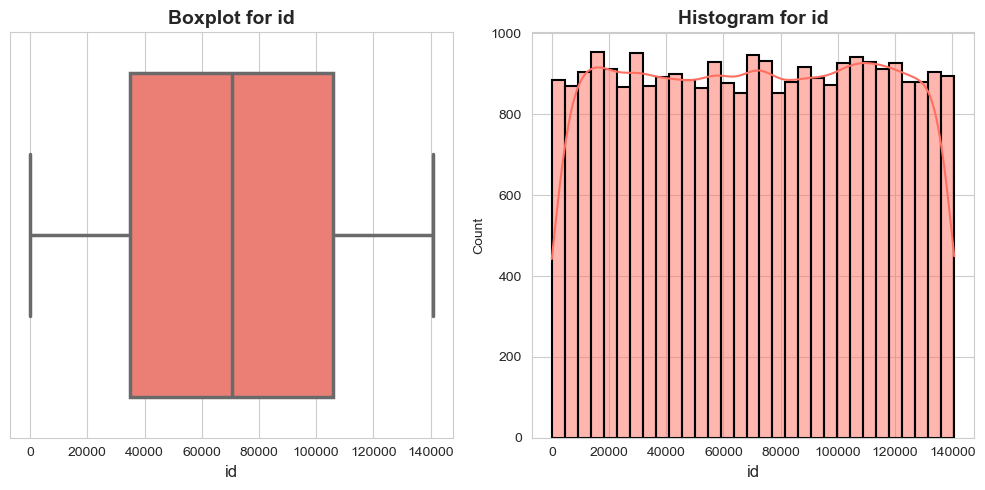

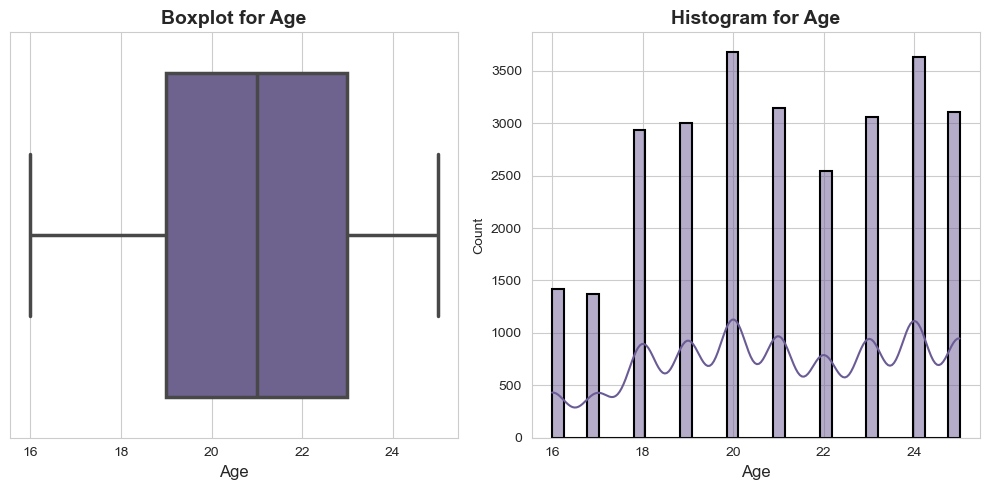

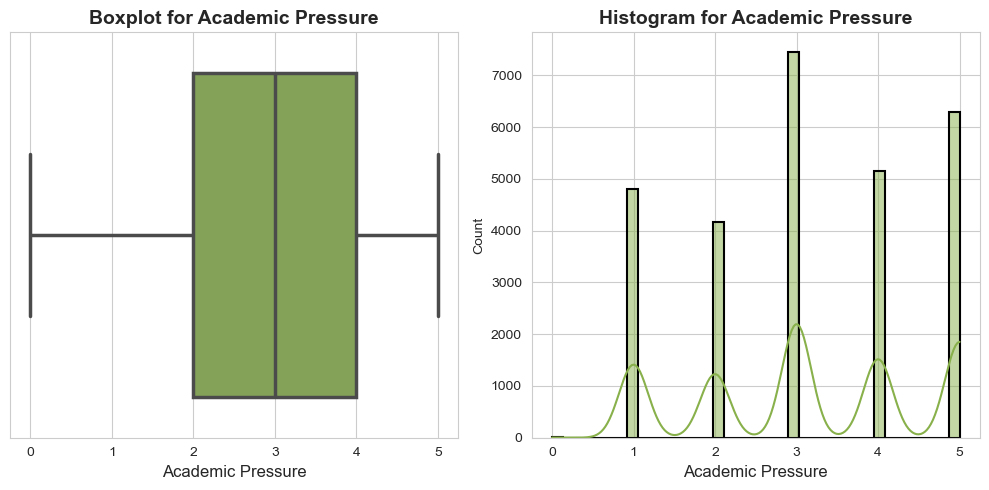

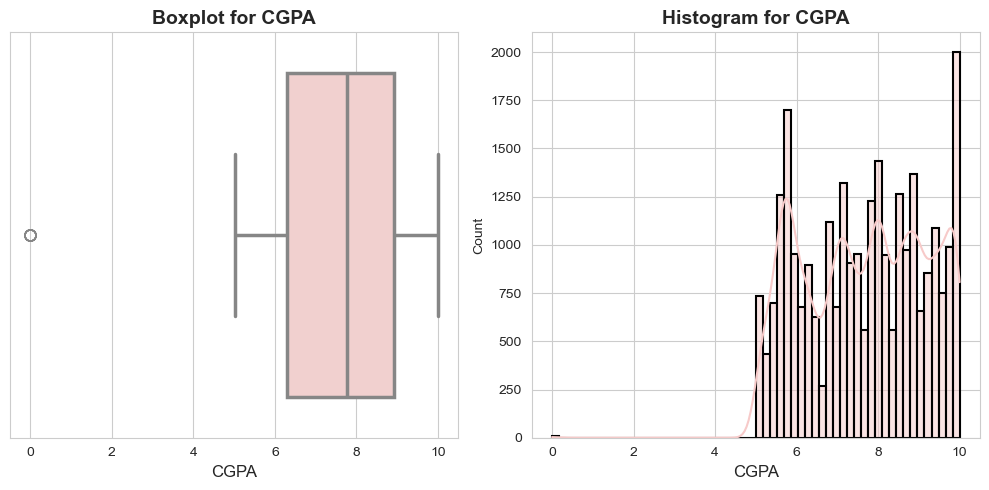

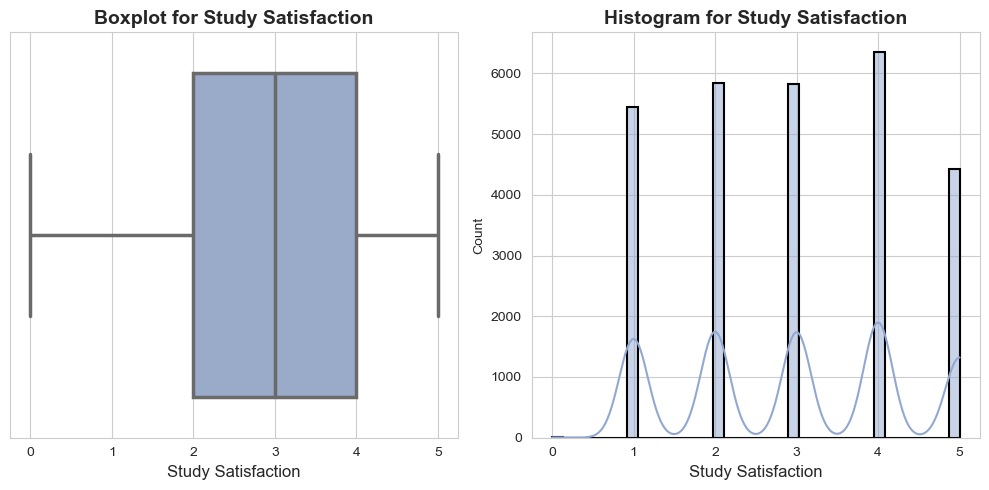

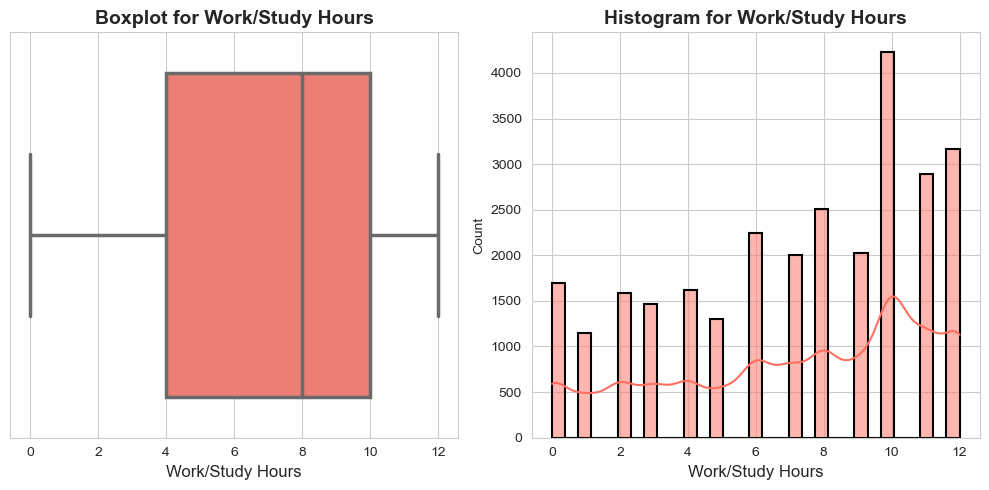

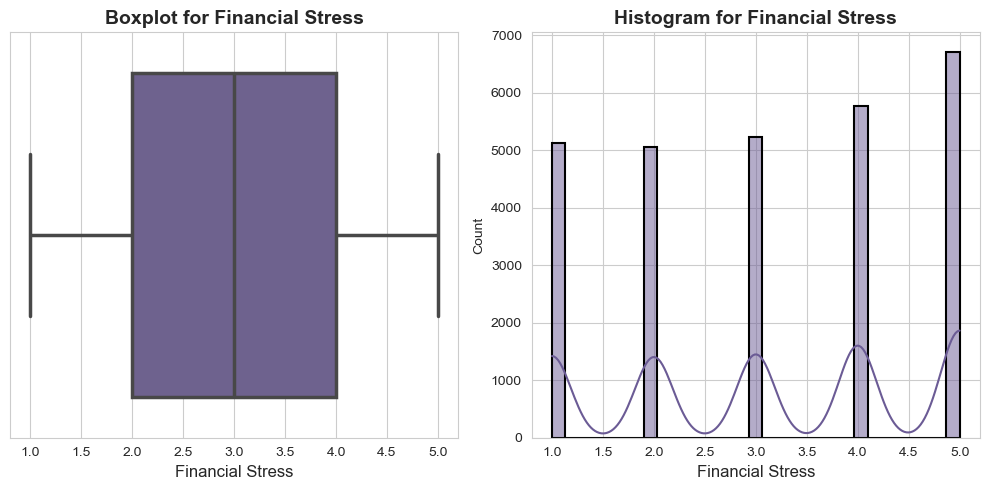

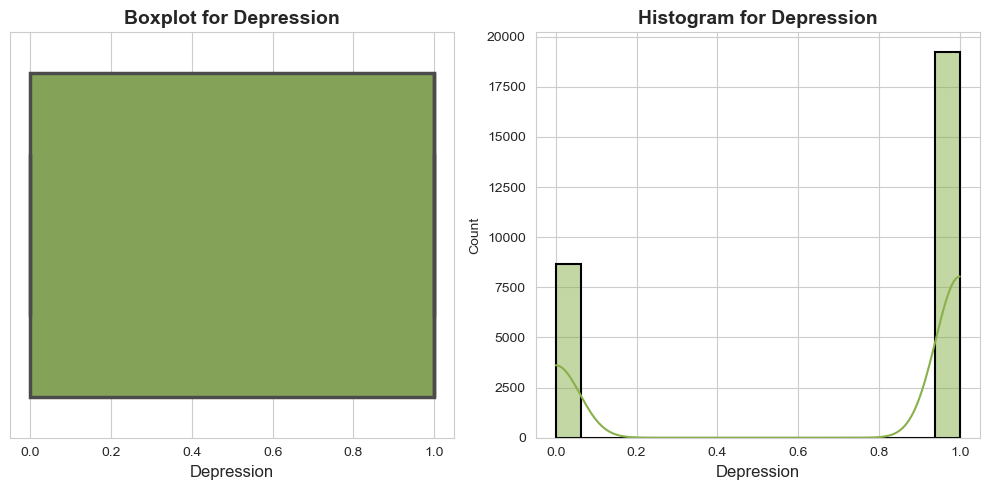

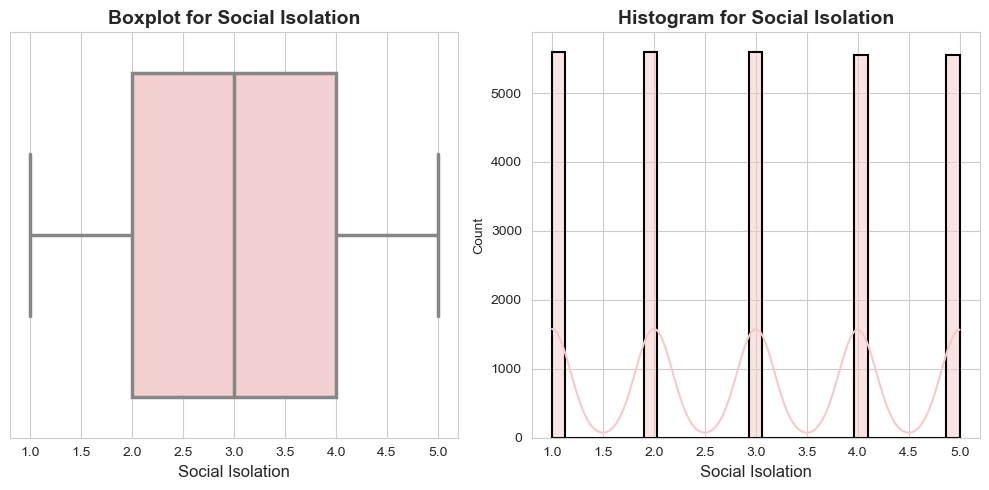

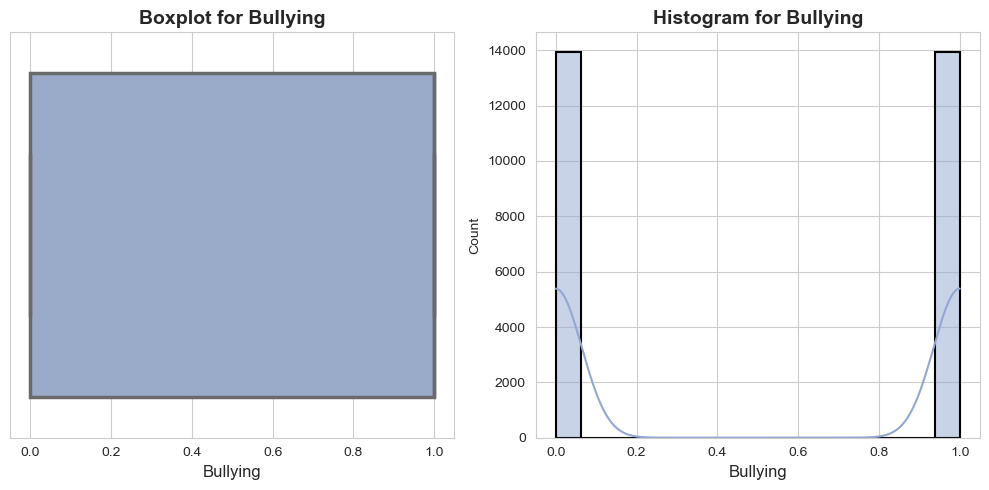

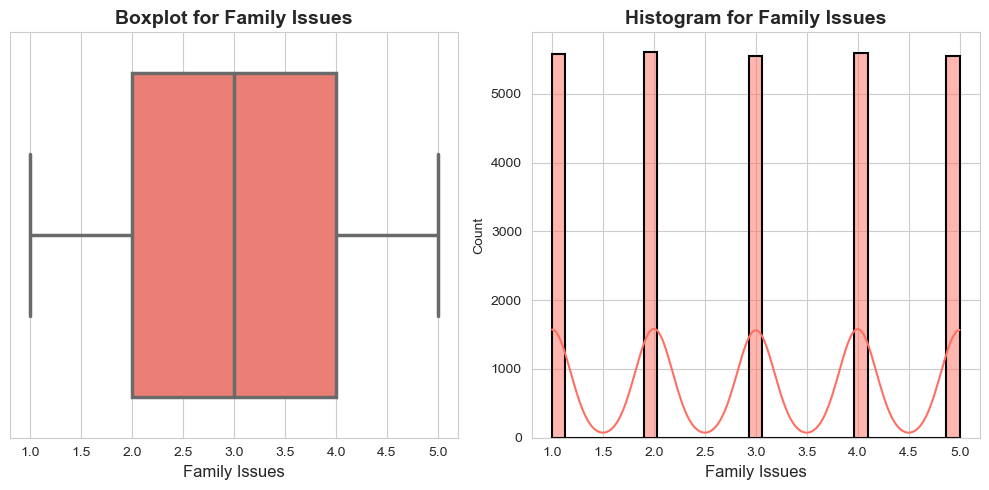

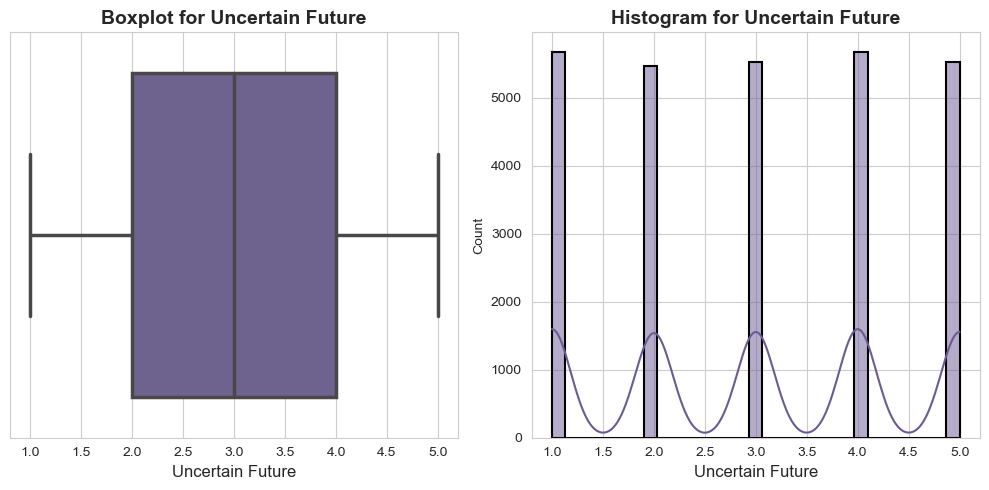

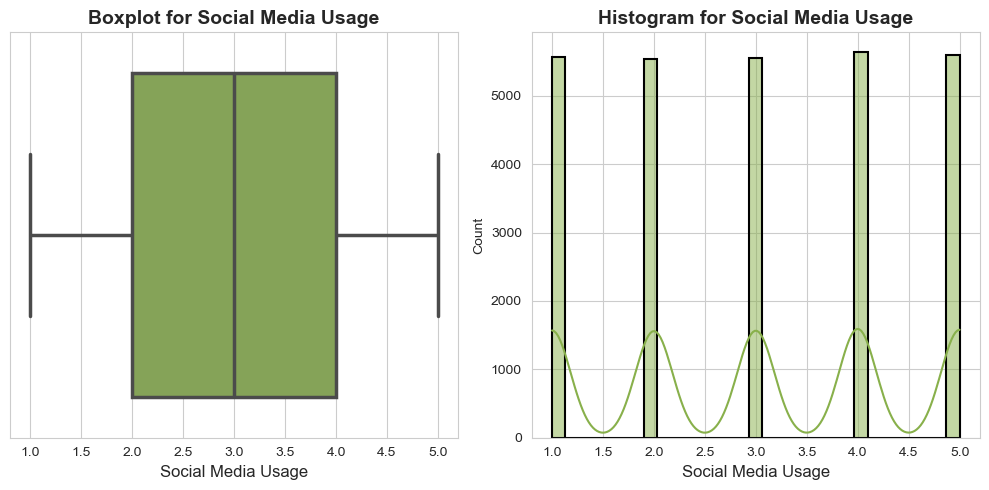

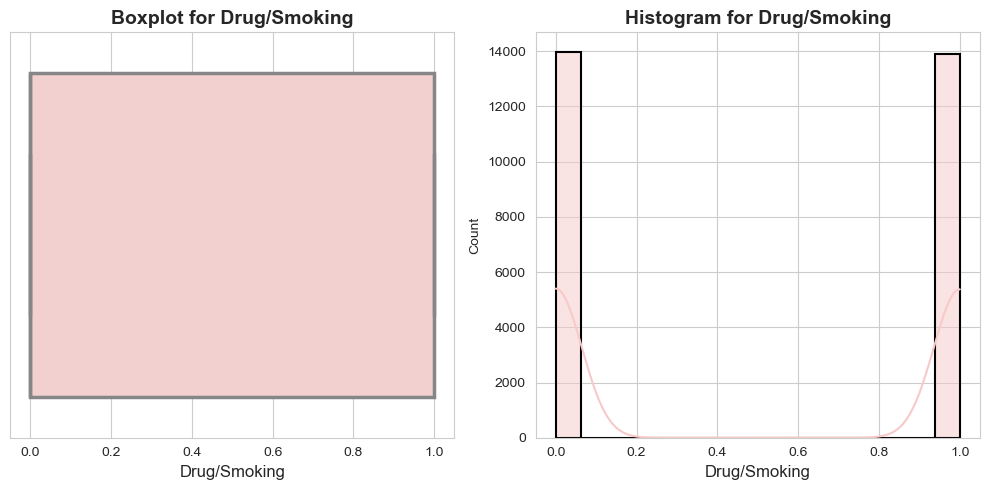

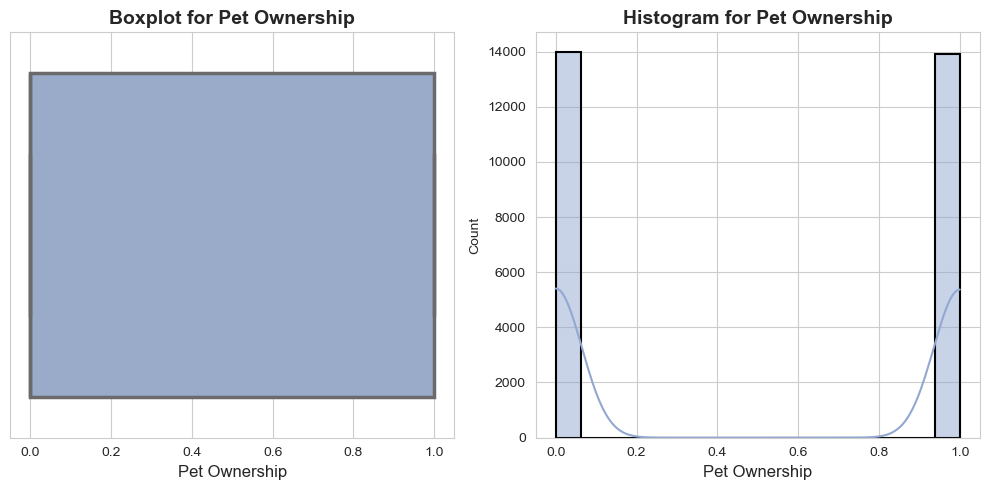

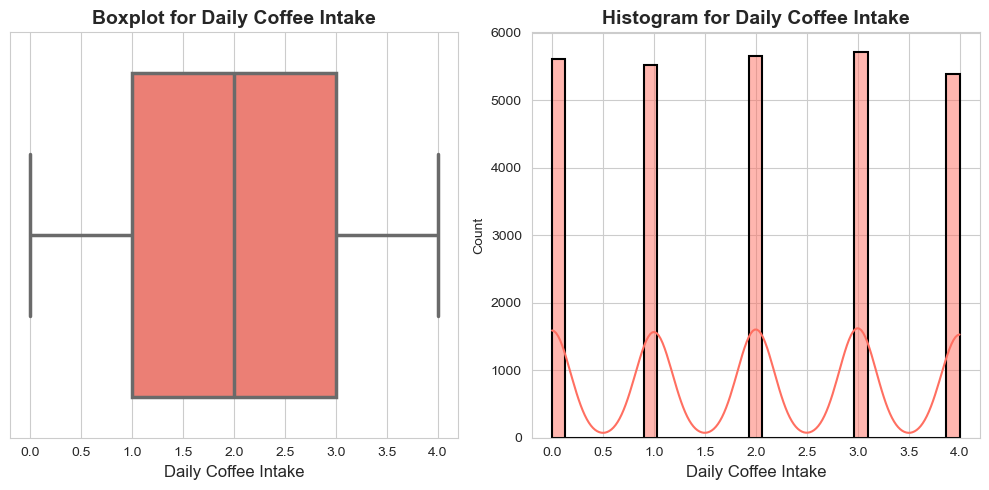

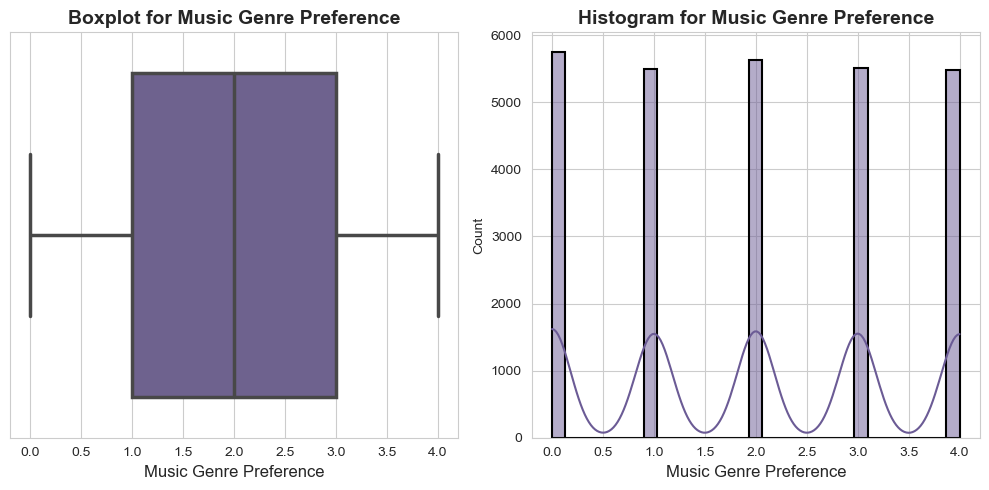

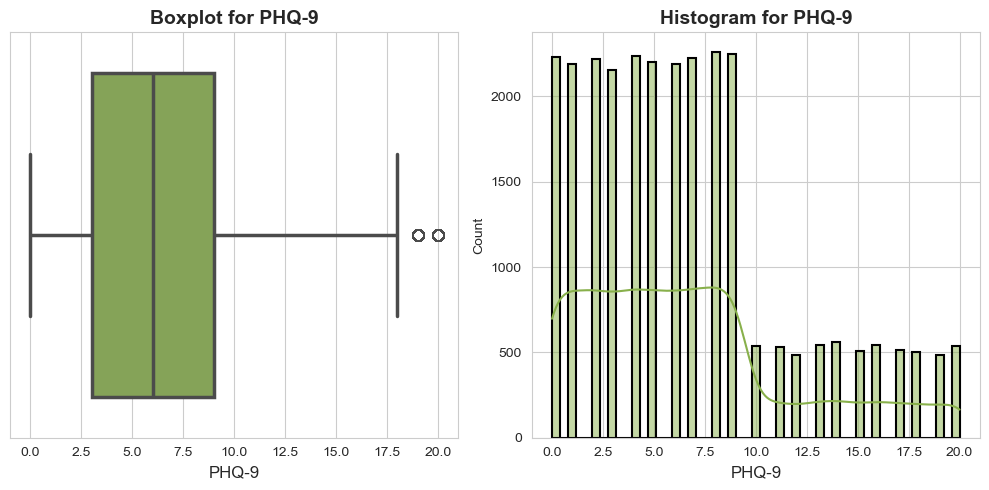

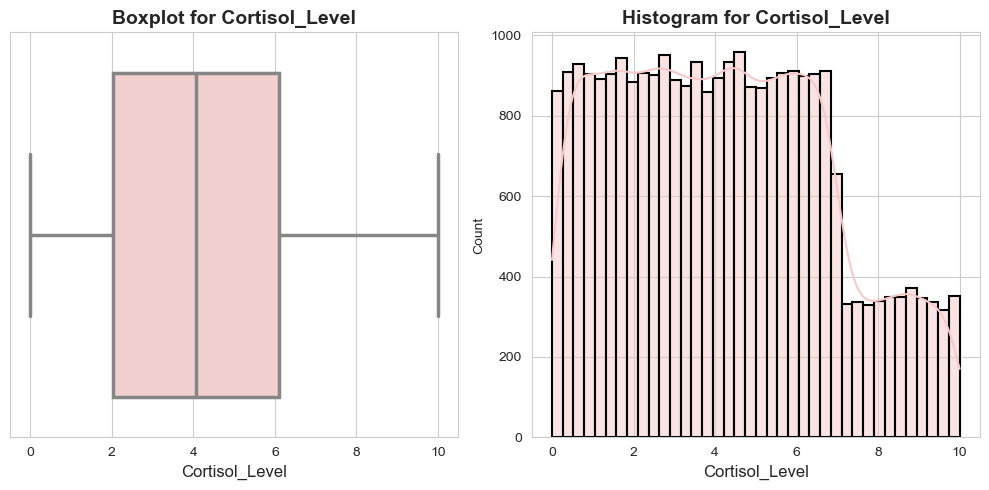

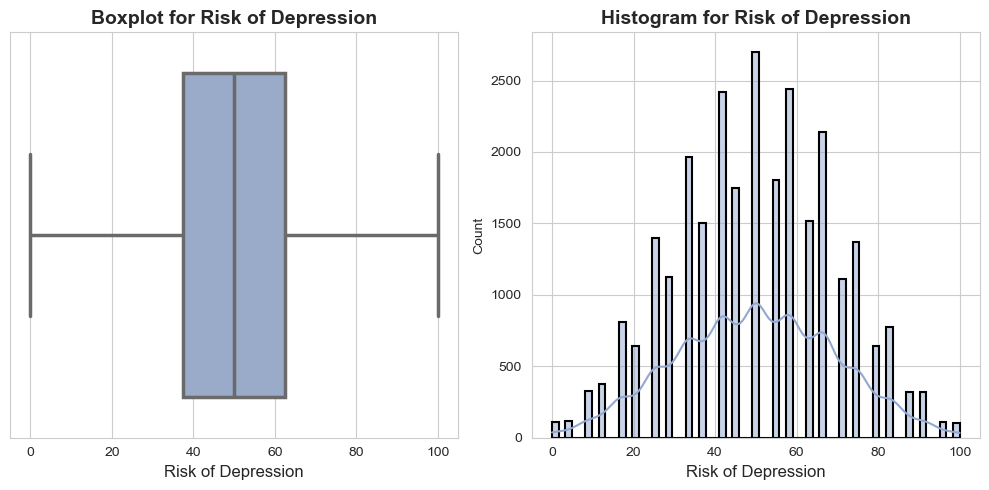

In [21]:
# Customize colors and styles
sns.set_style("whitegrid")
custom_palette = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9", "#92a8d1"]

# Visualize the outliers
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(10, 5))
    
    # Boxplot with custom colors
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color=custom_palette[i % len(custom_palette)], linewidth=2.5, fliersize=8)
    plt.title(f'Boxplot for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    # Histogram with KDE and custom color
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, color=custom_palette[i % len(custom_palette)], edgecolor="black", linewidth=1.5)
    plt.title(f'Histogram for {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [22]:
#Identify outliers for numeric columns
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1                  

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = outliers.shape[0]
    outliers_summary[col] = outliers_count

for col, count in outliers_summary.items():
    print(f"Column: {col}, Outliers: {count}")

Column: id, Outliers: 0
Column: Age, Outliers: 0
Column: Academic Pressure, Outliers: 0
Column: CGPA, Outliers: 9
Column: Study Satisfaction, Outliers: 0
Column: Work/Study Hours, Outliers: 0
Column: Financial Stress, Outliers: 0
Column: Depression, Outliers: 0
Column: Social Isolation, Outliers: 0
Column: Bullying, Outliers: 0
Column: Family Issues, Outliers: 0
Column: Uncertain Future, Outliers: 0
Column: Social Media Usage, Outliers: 0
Column: Drug/Smoking, Outliers: 0
Column: Pet Ownership, Outliers: 0
Column: Daily Coffee Intake, Outliers: 0
Column: Music Genre Preference, Outliers: 0
Column: PHQ-9, Outliers: 1022
Column: Cortisol_Level, Outliers: 0
Column: Risk of Depression, Outliers: 0


In [23]:
def calculate_outlier_percentage(df):
    outlier_data = []

    for column in df.select_dtypes(include=[np.number]): 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(df)) * 100

        outlier_data.append([column, round(outlier_percentage, 2)])

    return pd.DataFrame(outlier_data, columns=['Feature', 'Outlier Percentage'])

outlier_df = calculate_outlier_percentage(df)
print(outlier_df)

                   Feature  Outlier Percentage
0                       id                0.00
1                      Age                0.00
2        Academic Pressure                0.00
3                     CGPA                0.03
4       Study Satisfaction                0.00
5         Work/Study Hours                0.00
6         Financial Stress                0.00
7         Social Isolation                0.00
8                 Bullying                0.00
9            Family Issues                0.00
10        Uncertain Future                0.00
11      Social Media Usage                0.00
12            Drug/Smoking                0.00
13           Pet Ownership                0.00
14     Daily Coffee Intake                0.00
15  Music Genre Preference                0.00
16                   PHQ-9                3.66
17          Cortisol_Level                0.00
18      Risk of Depression                0.00
19              Depression                0.00


Data Preprocessing

In [24]:
enc=LabelEncoder()

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = enc.fit_transform(df[col])
df_encoded  

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,1,23.0,51,5.0,8.97,2.0,0,0,3,...,2,1,2,0,1,3,10,6.655000,29.166667,1
1,8,0,24.0,3,2.0,5.90,5.0,0,1,10,...,4,1,4,0,1,4,4,5.123958,58.333333,0
2,26,1,17.0,44,3.0,7.03,5.0,2,0,5,...,5,0,4,1,2,3,4,4.190609,95.833333,0
3,30,0,17.0,49,3.0,5.59,2.0,1,1,7,...,1,1,0,1,4,0,9,7.467984,33.333333,1
4,32,0,25.0,16,4.0,8.13,3.0,0,1,16,...,1,1,1,0,4,3,9,0.406585,12.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,0,25.0,45,5.0,5.75,5.0,0,3,11,...,5,1,1,0,1,1,1,2.362973,37.500000,0
27897,140686,1,19.0,25,2.0,9.40,3.0,2,0,22,...,5,1,4,1,0,0,5,2.683625,50.000000,0
27898,140689,1,23.0,9,3.0,6.61,4.0,0,3,0,...,4,1,2,0,1,2,8,4.565350,66.666667,0
27899,140690,0,18.0,25,5.0,6.88,2.0,2,0,11,...,5,0,3,1,0,2,11,9.556027,83.333333,1


In [25]:
#make sure that every column is encoded correctly
print(df.dtypes)  

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Social Isolation                           int64
Bullying                                   int64
Family Issues                              int64
Uncertain Future                           int64
Social Media Usage                         int64
Drug/Smoking                               int64
Favorite Color      

In [26]:
# standardization
from sklearn.preprocessing import StandardScaler

depression = df_encoded["Depression"]
df_encoded.drop("Depression", axis=1, inplace=True)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)
df_standardized = pd.DataFrame(standardized_data, columns=df_encoded.columns)
df_standardized["Depression"] = depression
df_standardized


,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,-1.733236,0.891373,0.740244,1.510523,1.345456,0.893354,-0.693539,-1.421814,-1.182432,-1.042063,...,-0.711510,1.002512,-0.003847,-0.996422,-0.704880,0.719349,0.647035,0.955627,-1.060984,1.0
1,-1.733089,-1.121865,1.116908,-1.424206,-0.826195,-1.194113,1.510565,-1.421814,-0.375754,0.116922,...,0.702086,1.002512,1.408253,-0.996422,-0.704880,1.425312,-0.518447,0.360493,0.429383,0.0
2,-1.732646,0.891373,-1.519737,1.082541,-0.102311,-0.425762,1.510565,0.459507,-1.182432,-0.710924,...,1.408884,-0.997494,1.408253,1.003591,0.005885,0.719349,-0.518447,-0.002310,2.345570,0.0
3,-1.732547,-1.121865,-1.519737,1.388242,-0.102311,-1.404899,-0.693539,-0.481154,-0.375754,-0.379786,...,-1.418308,1.002512,-1.415947,1.003591,1.427416,-1.398539,0.452788,1.271643,-0.848075,1.0
4,-1.732498,-1.121865,1.493571,-0.629384,0.621573,0.322191,0.041162,-1.421814,-0.375754,1.110337,...,-1.418308,1.002512,-0.709897,-0.996422,1.427416,0.719349,0.452788,-1.473204,-1.912623,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,1.728342,-1.121865,1.493571,1.143682,1.345456,-1.296106,1.510565,-1.421814,1.237602,0.282491,...,1.408884,1.002512,-0.709897,-0.996422,-0.704880,-0.692576,-1.101189,-0.712733,-0.635165,0.0
27894,1.728367,0.891373,-0.766410,-0.079122,-0.826195,1.185735,0.041162,0.459507,-1.182432,2.103752,...,1.408884,1.002512,1.408253,1.003591,-1.415645,-1.398539,-0.324200,-0.588092,0.003564,0.0
27895,1.728441,0.891373,0.740244,-1.057365,-0.102311,-0.711343,0.775863,-1.421814,1.237602,-1.538770,...,0.702086,1.002512,-0.003847,-0.996422,-0.704880,0.013386,0.258541,0.143356,0.855203,1.0
27896,1.728465,-1.121865,-1.143073,-0.079122,1.345456,-0.527755,-0.693539,0.459507,-1.182432,0.282491,...,1.408884,-0.997494,0.702203,1.003591,-1.415645,0.013386,0.841283,2.083290,1.706841,0.0


In [27]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_encoded)
df_normalized = pd.DataFrame(normalized_data, columns=df_encoded.columns)
df_normalized["Depression"] = depression
df_normalized


,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,0.000000,1.0,0.777778,1.000000,1.0,0.897,0.4,0.00,0.000000,0.130435,...,0.25,1.0,0.50,0.0,0.25,0.75,0.50,0.665532,0.291667,1.0
1,0.000043,0.0,0.888889,0.058824,0.4,0.590,1.0,0.00,0.333333,0.434783,...,0.75,1.0,1.00,0.0,0.25,1.00,0.20,0.512419,0.583333,0.0
2,0.000171,1.0,0.111111,0.862745,0.6,0.703,1.0,0.50,0.000000,0.217391,...,1.00,0.0,1.00,1.0,0.50,0.75,0.20,0.419078,0.958333,0.0
3,0.000199,0.0,0.111111,0.960784,0.6,0.559,0.4,0.25,0.333333,0.304348,...,0.00,1.0,0.00,1.0,1.00,0.00,0.45,0.746836,0.333333,1.0
4,0.000213,0.0,1.000000,0.313725,0.8,0.813,0.6,0.00,0.333333,0.695652,...,0.00,1.0,0.25,0.0,1.00,0.75,0.45,0.040653,0.125000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0.999900,0.0,1.000000,0.882353,1.0,0.575,1.0,0.00,1.000000,0.478261,...,1.00,1.0,0.25,0.0,0.25,0.25,0.05,0.236304,0.375000,0.0
27894,0.999908,1.0,0.333333,0.490196,0.4,0.940,0.6,0.50,0.000000,0.956522,...,1.00,1.0,1.00,1.0,0.00,0.00,0.25,0.268371,0.500000,0.0
27895,0.999929,1.0,0.777778,0.176471,0.6,0.661,0.8,0.00,1.000000,0.000000,...,0.75,1.0,0.50,0.0,0.25,0.50,0.40,0.456555,0.666667,1.0
27896,0.999936,0.0,0.222222,0.490196,1.0,0.688,0.4,0.50,0.000000,0.478261,...,1.00,0.0,0.75,1.0,0.00,0.50,0.55,0.955653,0.833333,0.0


In [28]:
df_encoded["Depression"] = depression
df_encoded.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,1,23.0,51,5.0,8.97,2.0,0,0,3,...,2,1,2,0,1,3,10,6.655000,29.166667,1
1,8,0,24.0,3,2.0,5.90,5.0,0,1,10,...,4,1,4,0,1,4,4,5.123958,58.333333,0
2,26,1,17.0,44,3.0,7.03,5.0,2,0,5,...,5,0,4,1,2,3,4,4.190609,95.833333,0
3,30,0,17.0,49,3.0,5.59,2.0,1,1,7,...,1,1,0,1,4,0,9,7.467984,33.333333,1
4,32,0,25.0,16,4.0,8.13,3.0,0,1,16,...,1,1,1,0,4,3,9,0.406585,12.500000,0


**Milestone 2:**

Data Analysis:

In [29]:
df.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,2,1,Green,0,1,3,10,6.655000,29.166667,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,4,1,Yellow,0,1,4,4,5.123958,58.333333,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,5,0,Yellow,1,2,3,4,4.190609,95.833333,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,1,1,Black,1,4,0,9,7.467984,33.333333,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,Blue,0,4,3,9,0.406585,12.500000,0


In [30]:
df_encoded.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,1,23.0,51,5.0,8.97,2.0,0,0,3,...,2,1,2,0,1,3,10,6.655000,29.166667,1
1,8,0,24.0,3,2.0,5.90,5.0,0,1,10,...,4,1,4,0,1,4,4,5.123958,58.333333,0
2,26,1,17.0,44,3.0,7.03,5.0,2,0,5,...,5,0,4,1,2,3,4,4.190609,95.833333,0
3,30,0,17.0,49,3.0,5.59,2.0,1,1,7,...,1,1,0,1,4,0,9,7.467984,33.333333,1
4,32,0,25.0,16,4.0,8.13,3.0,0,1,16,...,1,1,1,0,4,3,9,0.406585,12.500000,0


In [31]:
df_normalized.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,0.000000,1.0,0.777778,1.000000,1.0,0.897,0.4,0.00,0.000000,0.130435,...,0.25,1.0,0.50,0.0,0.25,0.75,0.50,0.665532,0.291667,1.0
1,0.000043,0.0,0.888889,0.058824,0.4,0.590,1.0,0.00,0.333333,0.434783,...,0.75,1.0,1.00,0.0,0.25,1.00,0.20,0.512419,0.583333,0.0
2,0.000171,1.0,0.111111,0.862745,0.6,0.703,1.0,0.50,0.000000,0.217391,...,1.00,0.0,1.00,1.0,0.50,0.75,0.20,0.419078,0.958333,0.0
3,0.000199,0.0,0.111111,0.960784,0.6,0.559,0.4,0.25,0.333333,0.304348,...,0.00,1.0,0.00,1.0,1.00,0.00,0.45,0.746836,0.333333,1.0
4,0.000213,0.0,1.000000,0.313725,0.8,0.813,0.6,0.00,0.333333,0.695652,...,0.00,1.0,0.25,0.0,1.00,0.75,0.45,0.040653,0.125000,0.0


In [32]:
df_standardized.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,-1.733236,0.891373,0.740244,1.510523,1.345456,0.893354,-0.693539,-1.421814,-1.182432,-1.042063,...,-0.711510,1.002512,-0.003847,-0.996422,-0.704880,0.719349,0.647035,0.955627,-1.060984,1.0
1,-1.733089,-1.121865,1.116908,-1.424206,-0.826195,-1.194113,1.510565,-1.421814,-0.375754,0.116922,...,0.702086,1.002512,1.408253,-0.996422,-0.704880,1.425312,-0.518447,0.360493,0.429383,0.0
2,-1.732646,0.891373,-1.519737,1.082541,-0.102311,-0.425762,1.510565,0.459507,-1.182432,-0.710924,...,1.408884,-0.997494,1.408253,1.003591,0.005885,0.719349,-0.518447,-0.002310,2.345570,0.0
3,-1.732547,-1.121865,-1.519737,1.388242,-0.102311,-1.404899,-0.693539,-0.481154,-0.375754,-0.379786,...,-1.418308,1.002512,-1.415947,1.003591,1.427416,-1.398539,0.452788,1.271643,-0.848075,1.0
4,-1.732498,-1.121865,1.493571,-0.629384,0.621573,0.322191,0.041162,-1.421814,-0.375754,1.110337,...,-1.418308,1.002512,-0.709897,-0.996422,1.427416,0.719349,0.452788,-1.473204,-1.912623,0.0


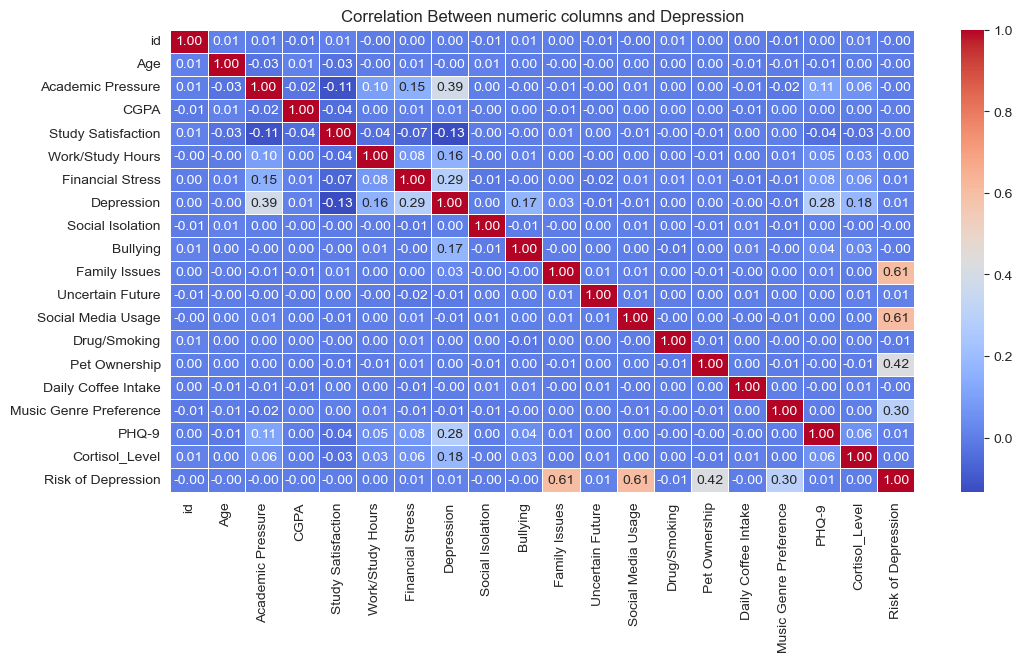

In [33]:
# correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between numeric columns and Depression")
plt.show()

In [34]:
# Hypothesis Testing
results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Depression"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[col] = p

for col, p_value in results.items():
    print(f"Chi-Square Test for {col} vs Depression: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"🔴 Significant Relationship! {col} is likely related to Depression.\n")
    else:
        print(f"🟢 No Significant Relationship. {col} is NOT strongly related to Depression.\n")

Chi-Square Test for Gender vs Depression: p-value = 0.8347
🟢 No Significant Relationship. Gender is NOT strongly related to Depression.

Chi-Square Test for City vs Depression: p-value = 0.0000
🔴 Significant Relationship! City is likely related to Depression.

Chi-Square Test for Sleep Duration vs Depression: p-value = 0.0000
🔴 Significant Relationship! Sleep Duration is likely related to Depression.

Chi-Square Test for Dietary Habits vs Depression: p-value = 0.0000
🔴 Significant Relationship! Dietary Habits is likely related to Depression.

Chi-Square Test for Degree vs Depression: p-value = 0.0000
🔴 Significant Relationship! Degree is likely related to Depression.

Chi-Square Test for Have you ever had suicidal thoughts ? vs Depression: p-value = 0.0000
🔴 Significant Relationship! Have you ever had suicidal thoughts ? is likely related to Depression.

Chi-Square Test for Family History of Mental Illness vs Depression: p-value = 0.0000
🔴 Significant Relationship! Family History of Me

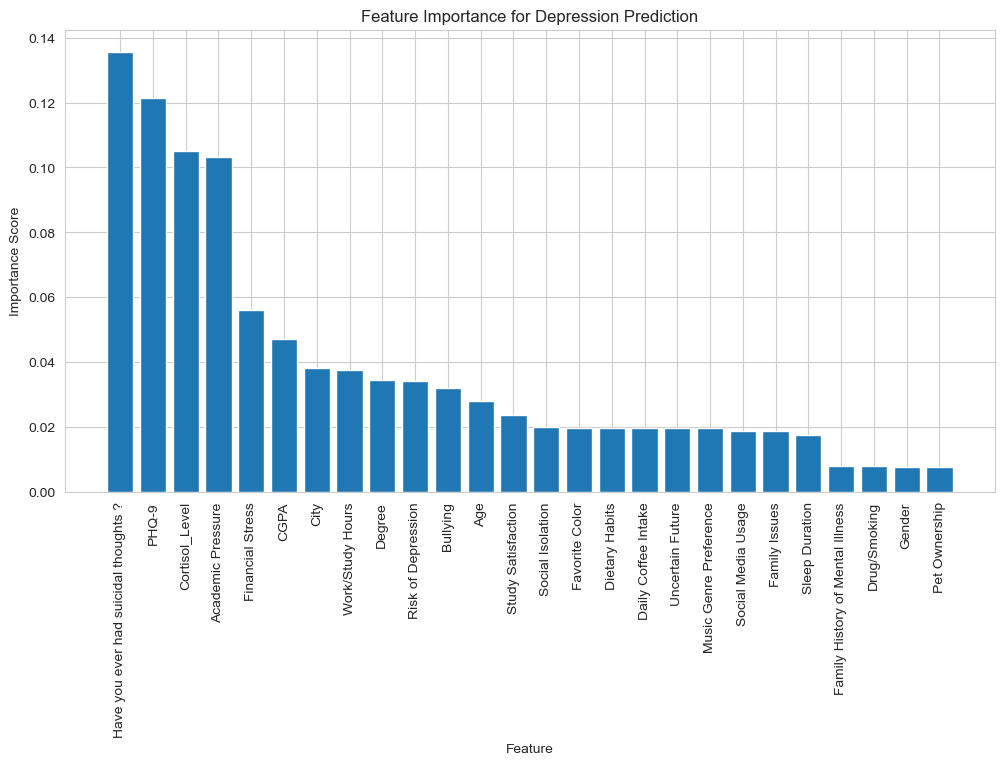

In [35]:
# feature importance by Random Forest

# Define features (X) and target (y)
X = df_encoded.drop(columns=['id', 'Depression'])  # Remove unnecessary columns
y = df_encoded['Depression']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12,6))
plt.title("Feature Importance for Depression Prediction")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

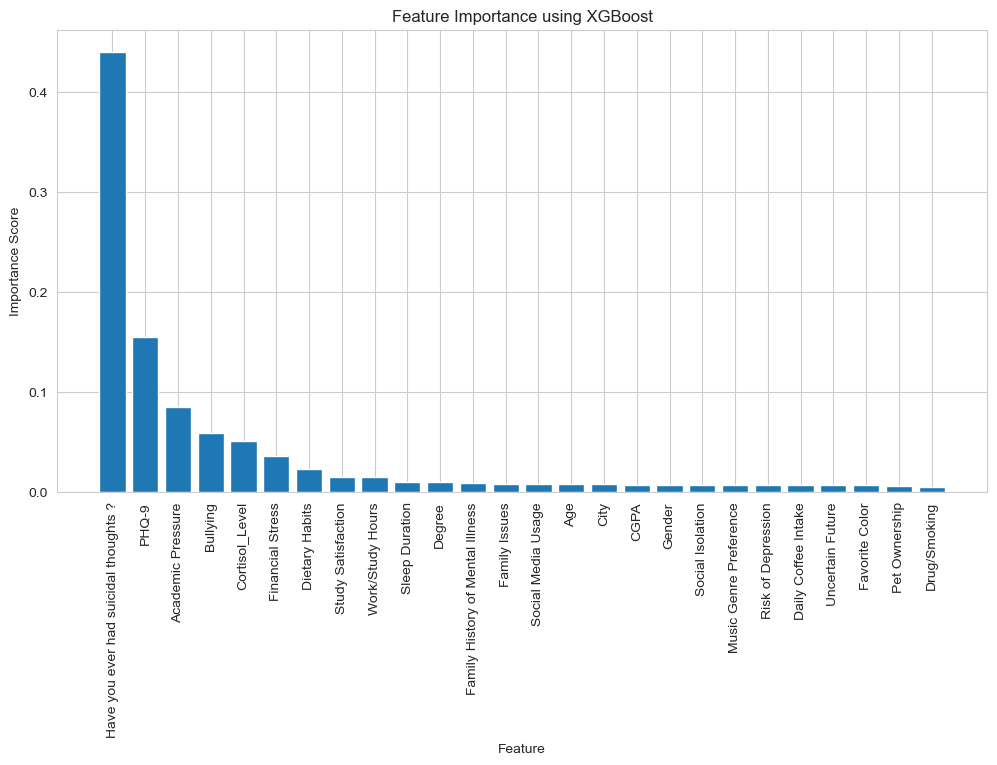

In [36]:
# feature importance by XGBoost


# Define features and target variable
X = df_encoded.drop(columns=['id', 'Depression'])  # Remove unnecessary columns
y = df_encoded['Depression']

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Get feature importance scores
importances = model.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12,6))
plt.title("Feature Importance using XGBoost")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()

Data Visualization

In [37]:
df.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,...,Social Media Usage,Drug/Smoking,Favorite Color,Pet Ownership,Daily Coffee Intake,Music Genre Preference,PHQ-9,Cortisol_Level,Risk of Depression,Depression
0,2,Male,23.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,...,2,1,Green,0,1,3,10,6.655000,29.166667,1
1,8,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,...,4,1,Yellow,0,1,4,4,5.123958,58.333333,0
2,26,Male,17.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,...,5,0,Yellow,1,2,3,4,4.190609,95.833333,0
3,30,Female,17.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,...,1,1,Black,1,4,0,9,7.467984,33.333333,1
4,32,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,...,1,1,Blue,0,4,3,9,0.406585,12.500000,0


In [38]:
df["Have you ever had suicidal thoughts ?"].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
categorical_columns

['Gender',
 'City',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness',
 'Favorite Color']

In [40]:
numeric_columns

['id',
 'Age',
 'Academic Pressure',
 'CGPA',
 'Study Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression',
 'Social Isolation',
 'Bullying',
 'Family Issues',
 'Uncertain Future',
 'Social Media Usage',
 'Drug/Smoking',
 'Pet Ownership',
 'Daily Coffee Intake',
 'Music Genre Preference',
 'PHQ-9',
 'Cortisol_Level',
 'Risk of Depression']

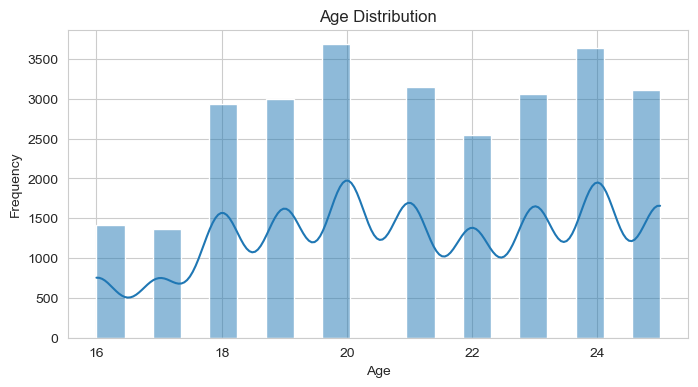

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

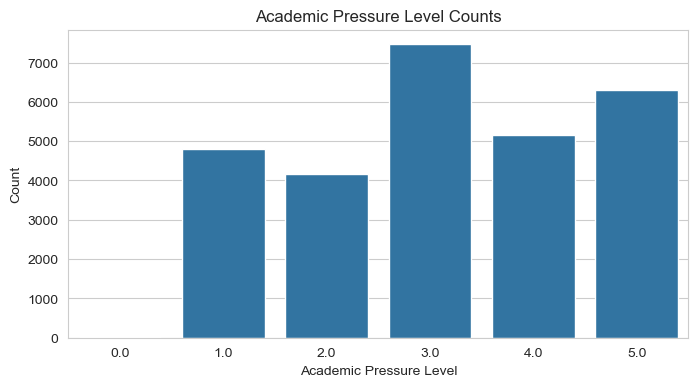

In [42]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Academic Pressure')
plt.title('Academic Pressure Level Counts')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Count')
plt.show()

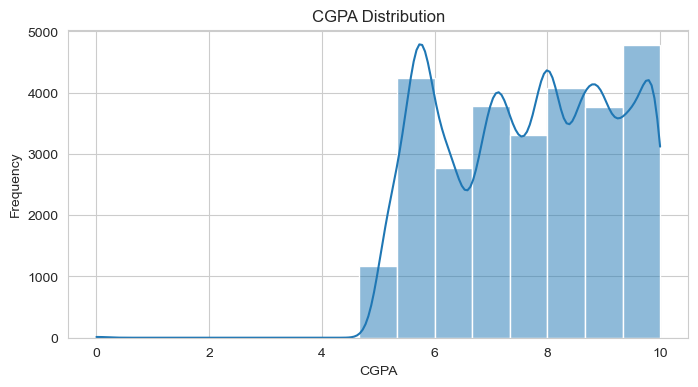

In [43]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='CGPA', bins=15, kde=True)
plt.title('CGPA Distribution')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

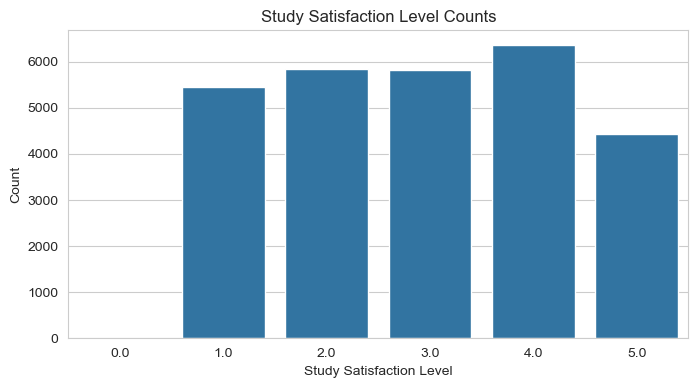

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Study Satisfaction')
plt.title('Study Satisfaction Level Counts')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Count')
plt.show()

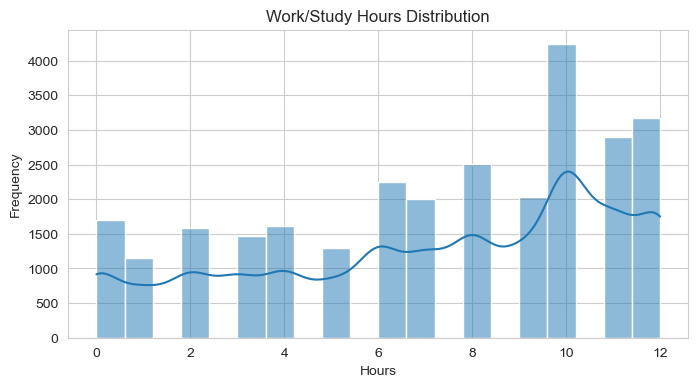

In [45]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Work/Study Hours', bins=20, kde=True)
plt.title('Work/Study Hours Distribution')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

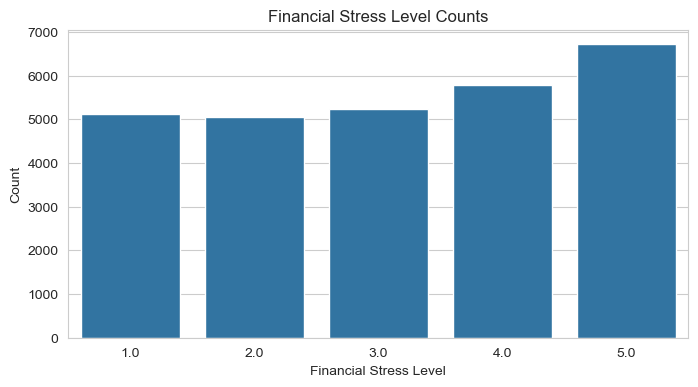

In [46]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Financial Stress')
plt.title('Financial Stress Level Counts')
plt.xlabel('Financial Stress Level')
plt.ylabel('Count')
plt.show()

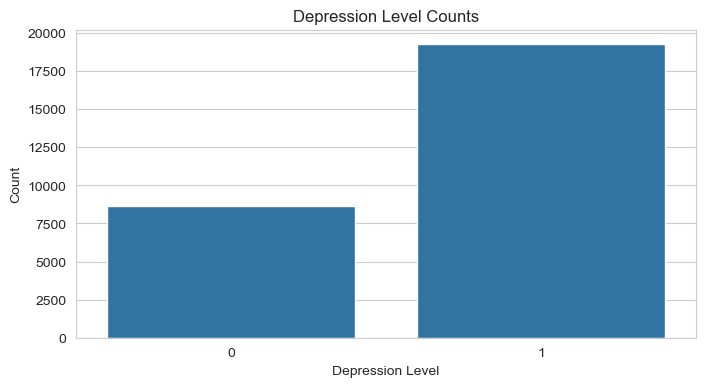

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Depression')
plt.title('Depression Level Counts')
plt.xlabel('Depression Level')
plt.ylabel('Count')
plt.show()

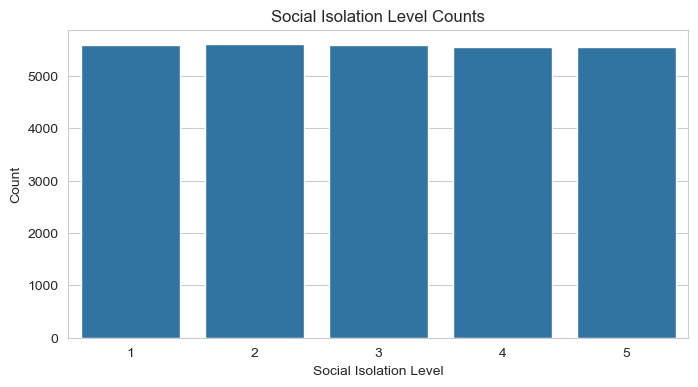

In [48]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Social Isolation')
plt.title('Social Isolation Level Counts')
plt.xlabel('Social Isolation Level')
plt.ylabel('Count')
plt.show()

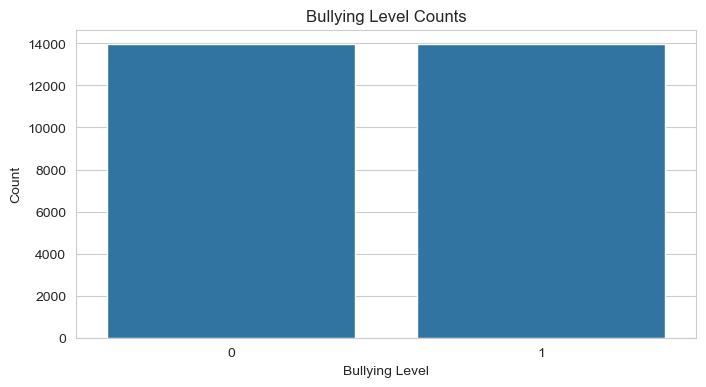

In [49]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Bullying')
plt.title('Bullying Level Counts')
plt.xlabel('Bullying Level')
plt.ylabel('Count')
plt.show()

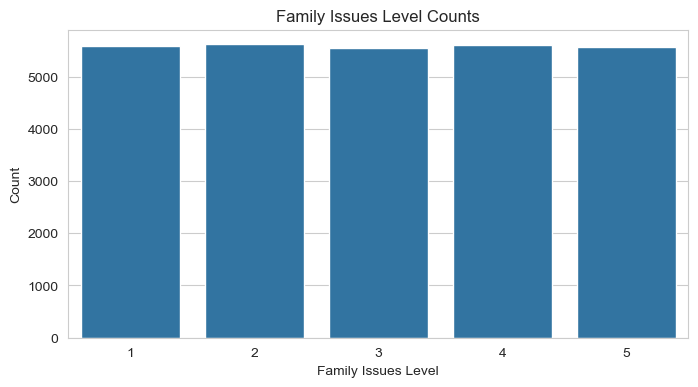

In [50]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family Issues')
plt.title('Family Issues Level Counts')
plt.xlabel('Family Issues Level')
plt.ylabel('Count')
plt.show()

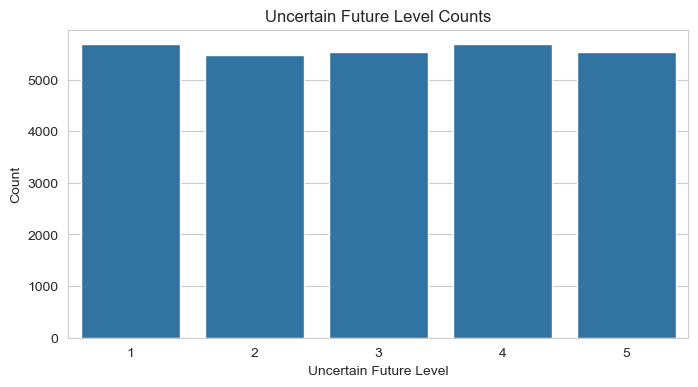

In [51]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Uncertain Future')
plt.title('Uncertain Future Level Counts')
plt.xlabel('Uncertain Future Level')
plt.ylabel('Count')
plt.show()

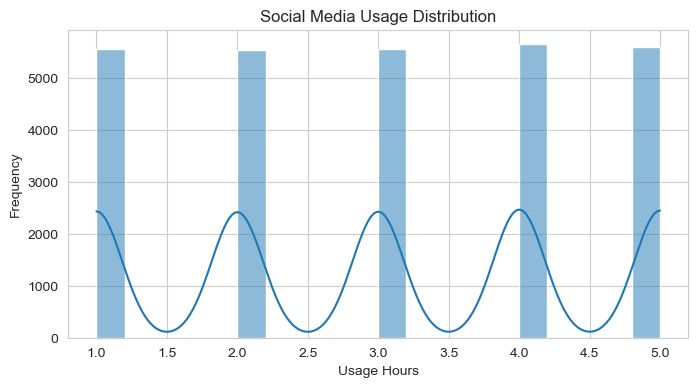

In [52]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Social Media Usage', bins=20, kde=True)
plt.title('Social Media Usage Distribution')
plt.xlabel('Usage Hours')
plt.ylabel('Frequency')
plt.show()

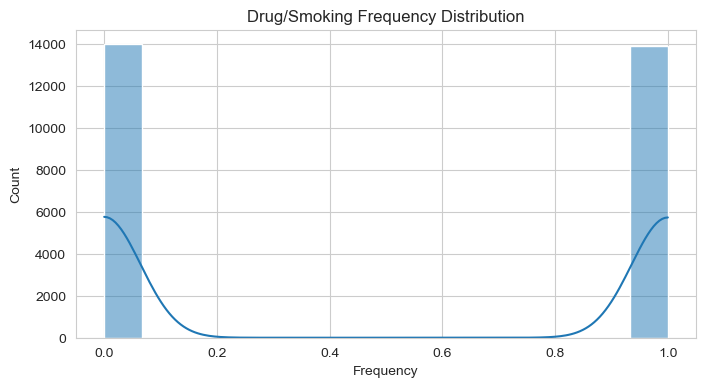

In [53]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Drug/Smoking', bins=15, kde=True)
plt.title('Drug/Smoking Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

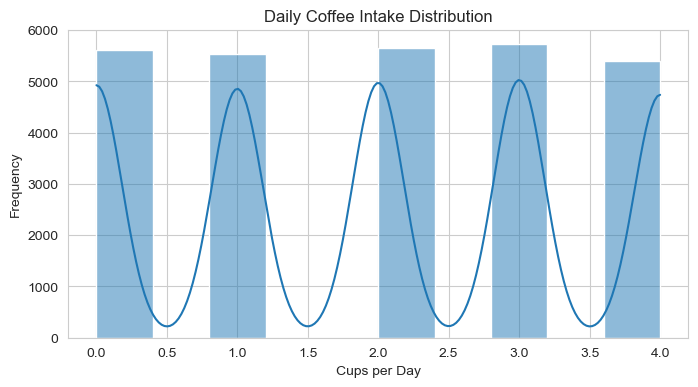

In [54]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Daily Coffee Intake', bins=10, kde=True)
plt.title('Daily Coffee Intake Distribution')
plt.xlabel('Cups per Day')
plt.ylabel('Frequency')
plt.show()

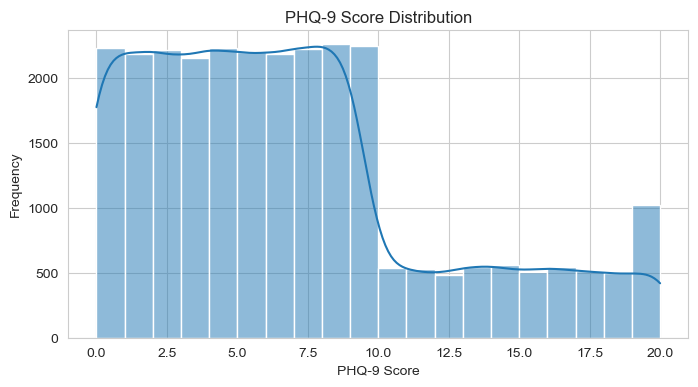

In [55]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='PHQ-9', bins=20, kde=True)
plt.title('PHQ-9 Score Distribution')
plt.xlabel('PHQ-9 Score')
plt.ylabel('Frequency')
plt.show()

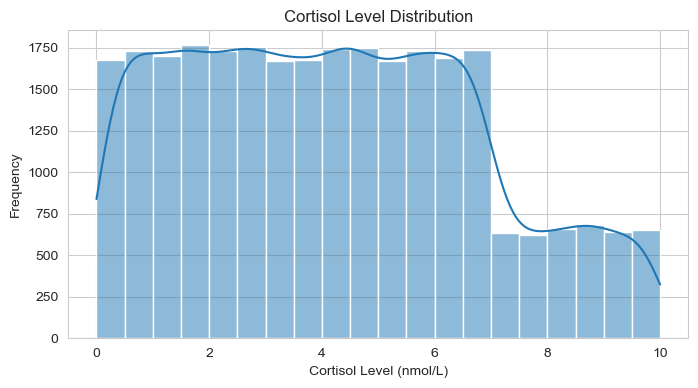

In [56]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Cortisol_Level', bins=20, kde=True)
plt.title('Cortisol Level Distribution')
plt.xlabel('Cortisol Level (nmol/L)')
plt.ylabel('Frequency')
plt.show()

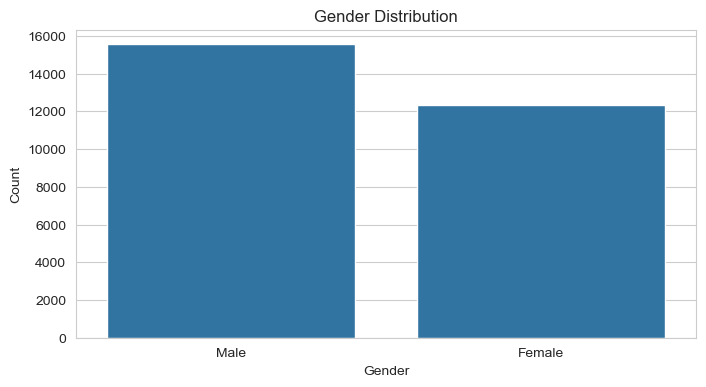

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

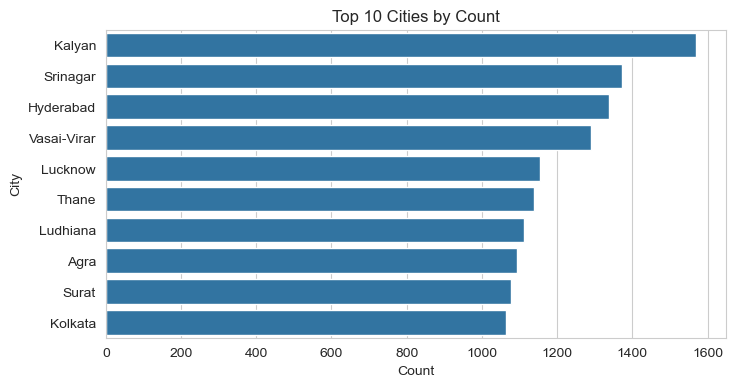

In [58]:
plt.figure(figsize=(8, 4))
city_counts = df['City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by Count')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

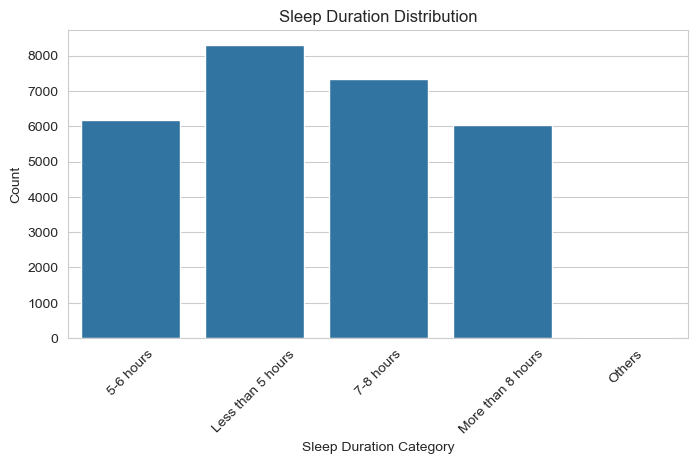

In [59]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Sleep Duration')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

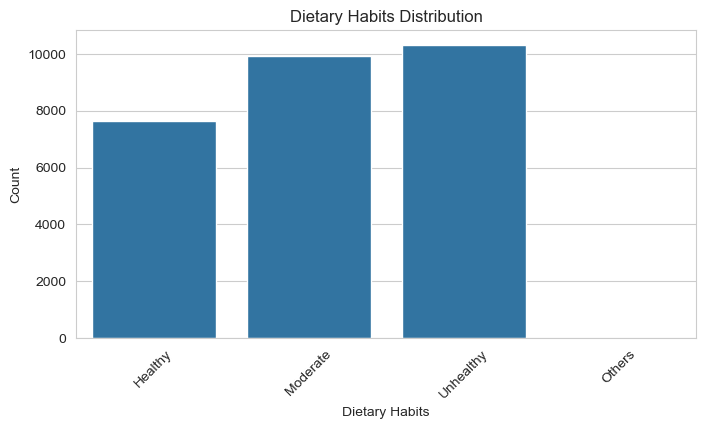

In [60]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Dietary Habits')
plt.title('Dietary Habits Distribution')
plt.xlabel('Dietary Habits')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

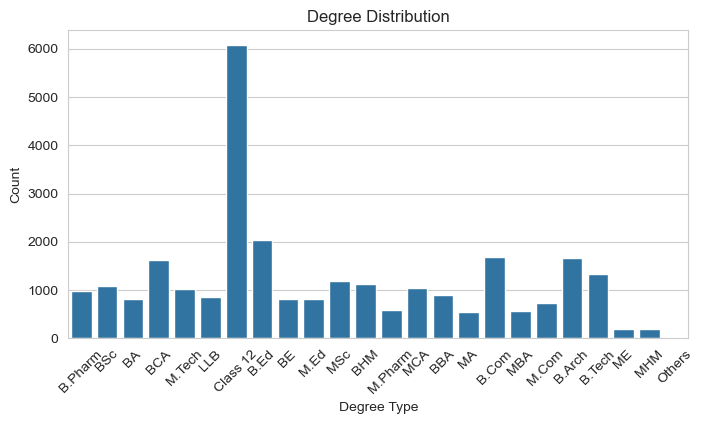

In [61]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Degree')
plt.title('Degree Distribution')
plt.xlabel('Degree Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

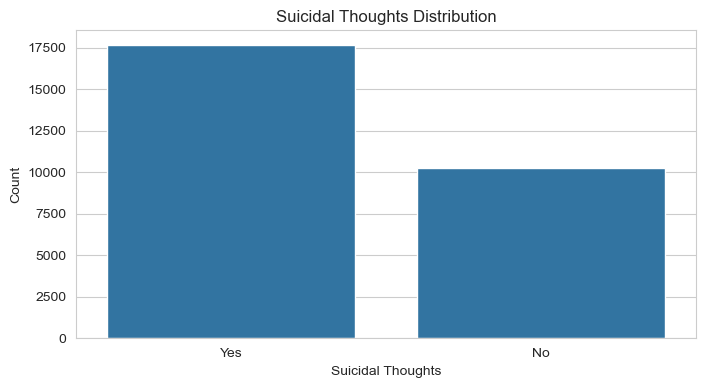

In [62]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Have you ever had suicidal thoughts ?')
plt.title('Suicidal Thoughts Distribution')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.show()

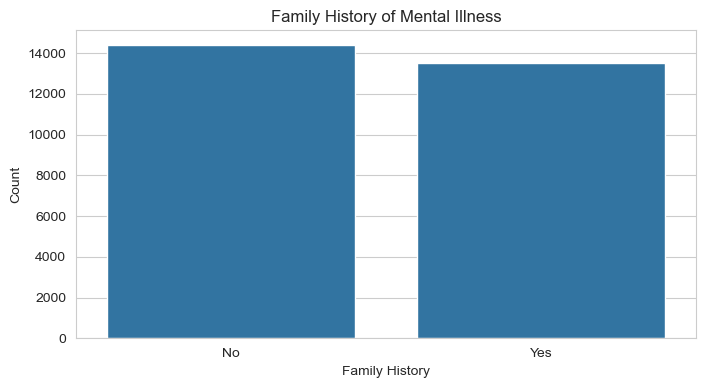

In [63]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Family History of Mental Illness')
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

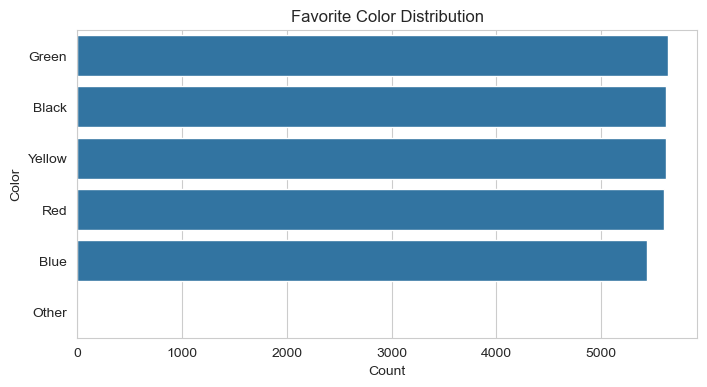

In [64]:
plt.figure(figsize=(8, 4))
color_counts = df['Favorite Color'].value_counts()
# Group rare colors into "Other"
color_counts = color_counts[color_counts >= 5]
color_counts['Other'] = df['Favorite Color'].value_counts()[df['Favorite Color'].value_counts() < 5].sum()
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title('Favorite Color Distribution')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

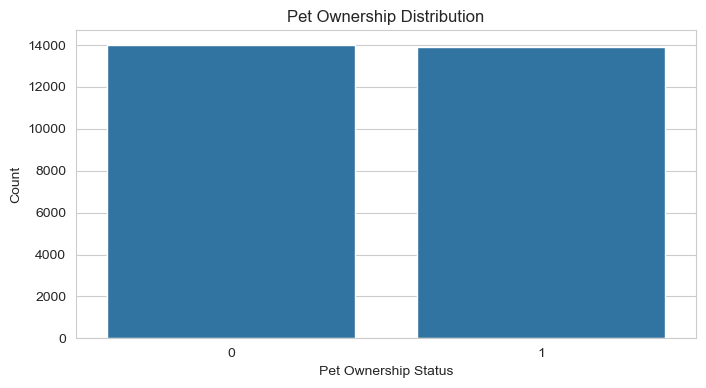

In [65]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Pet Ownership')
plt.title('Pet Ownership Distribution')
plt.xlabel('Pet Ownership Status')
plt.ylabel('Count')
plt.show()

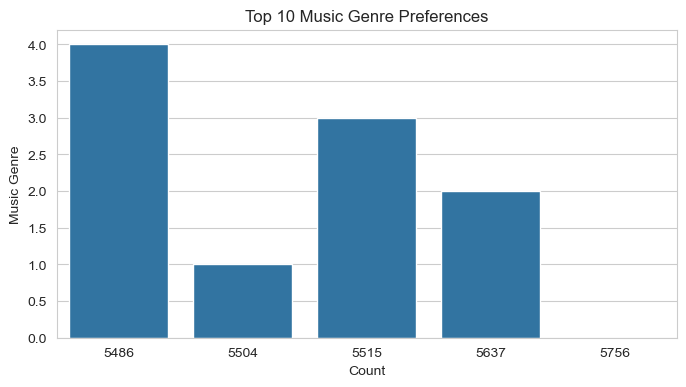

In [66]:
plt.figure(figsize=(8, 4))
genre_counts = df['Music Genre Preference'].value_counts().head(10)  # Top 10 genres
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Music Genre Preferences')
plt.xlabel('Count')
plt.ylabel('Music Genre')
plt.show()

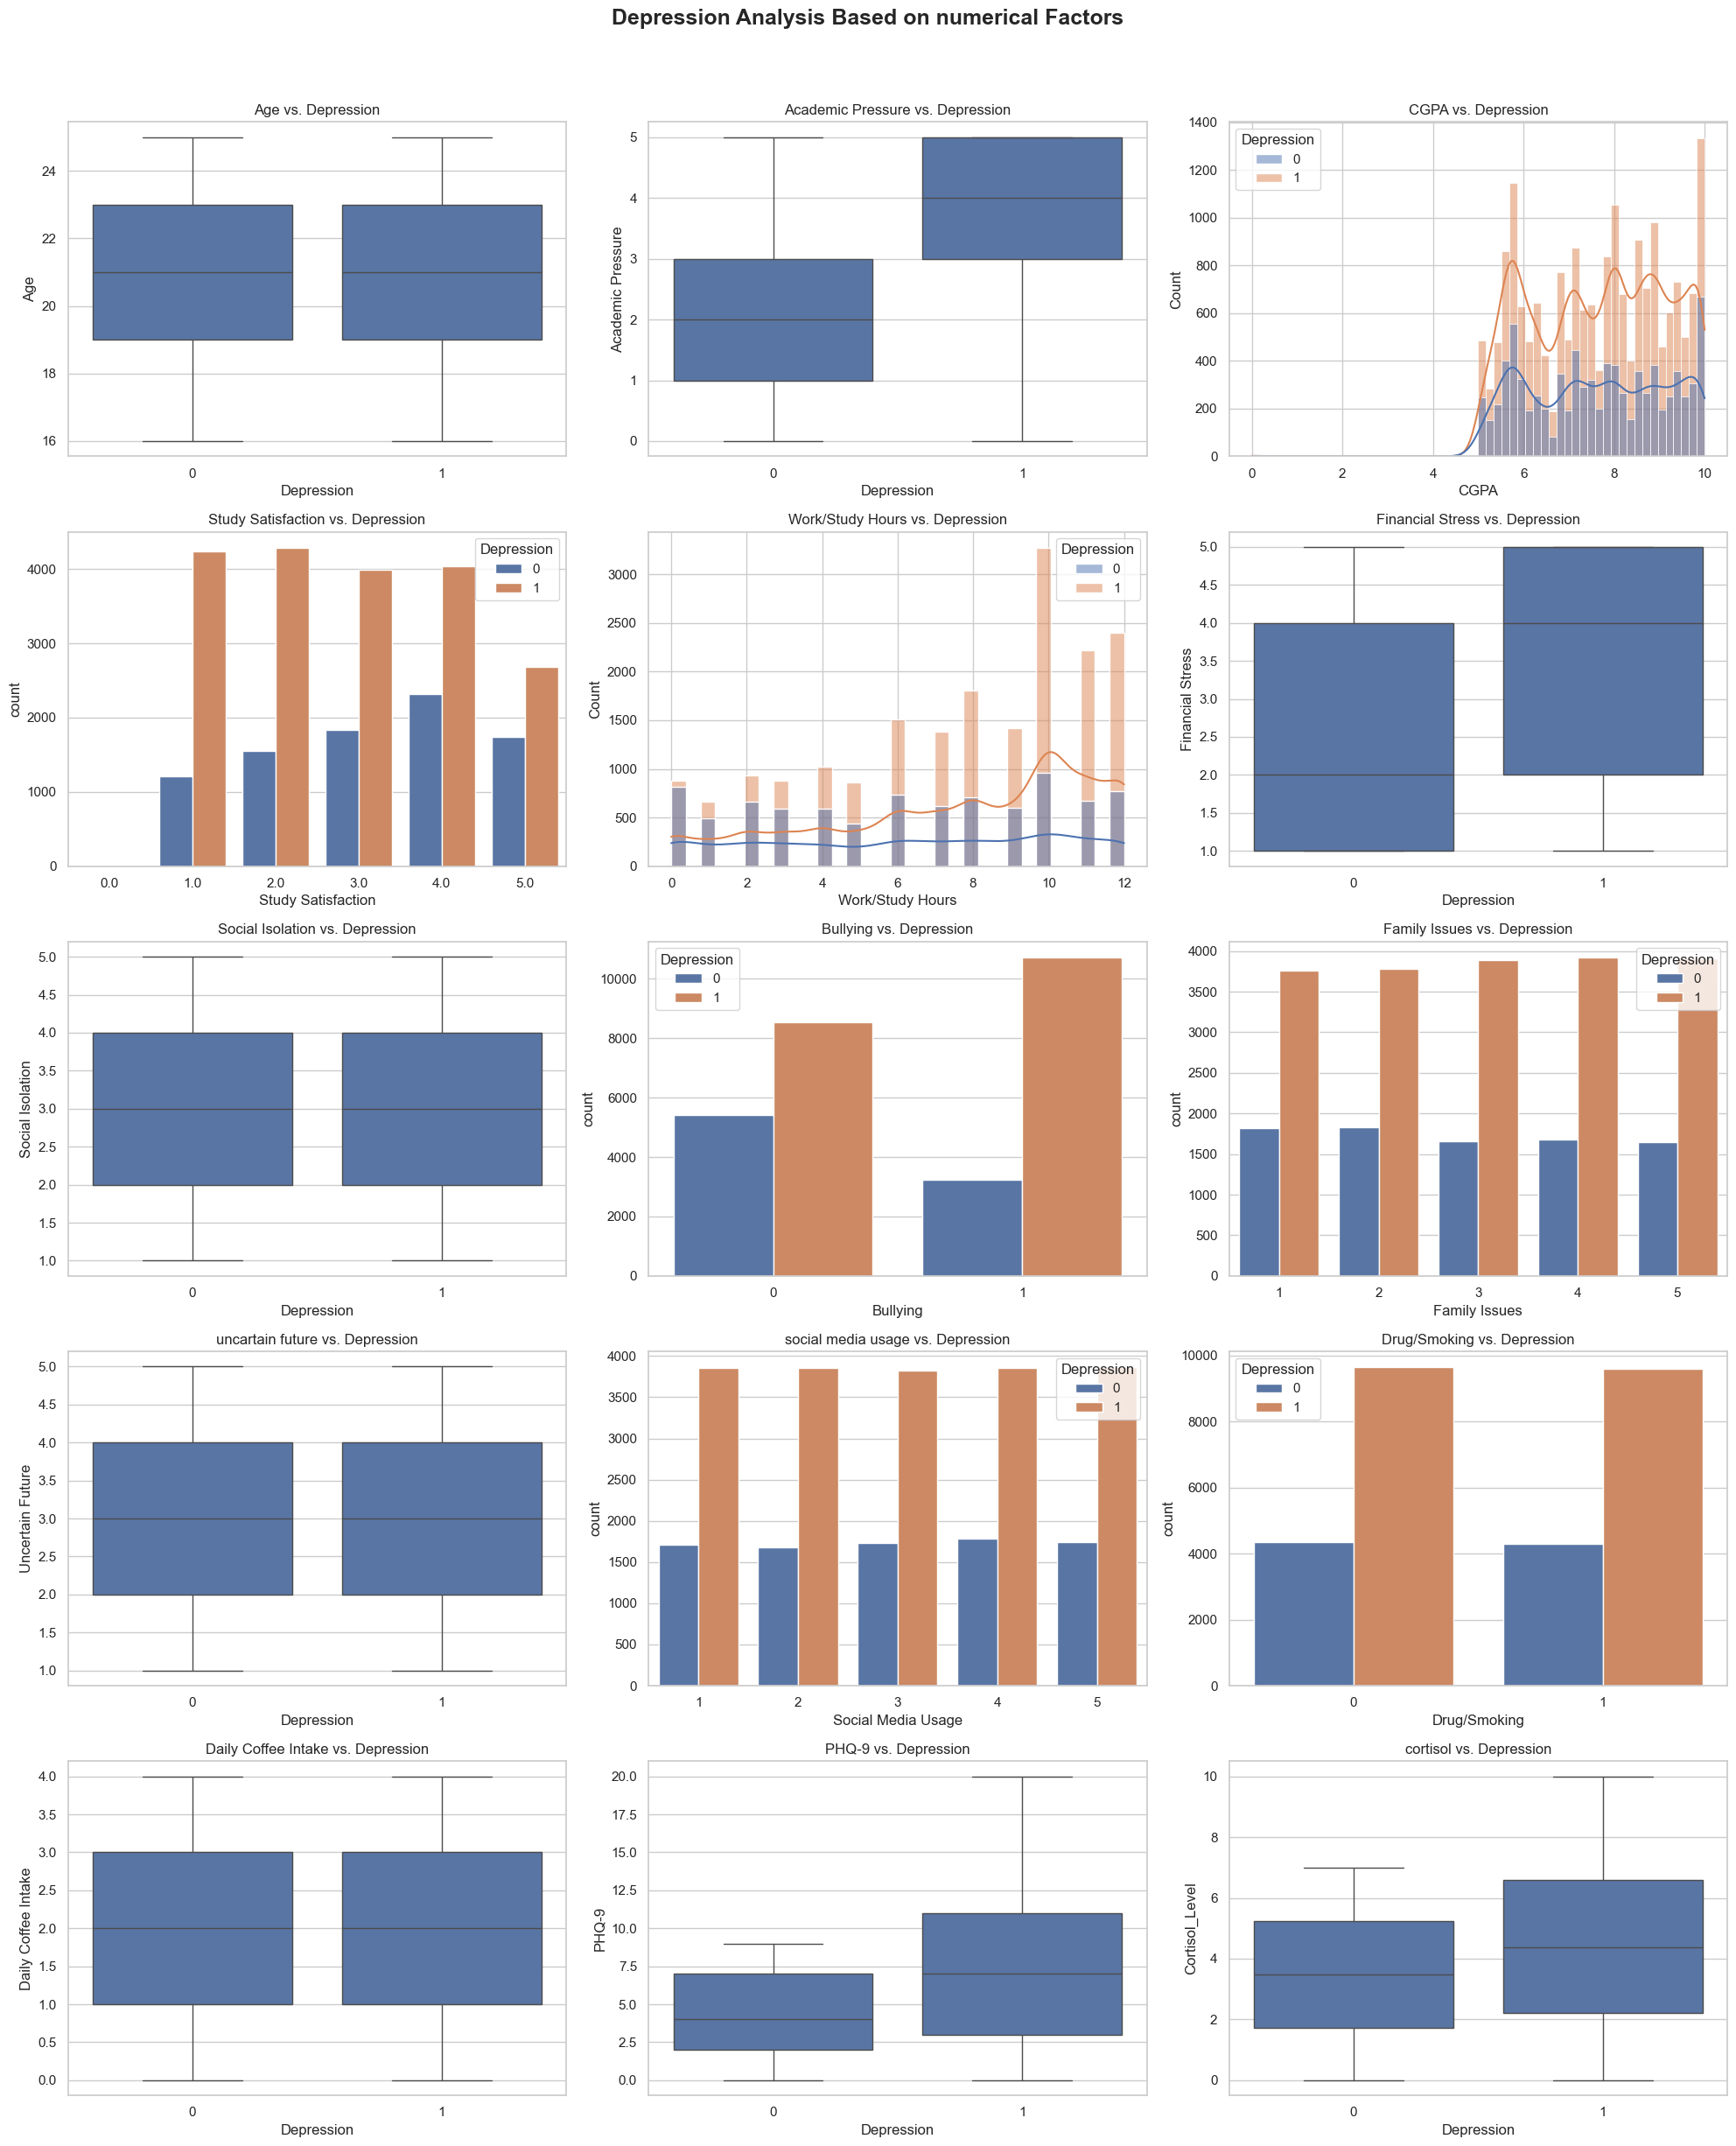

In [67]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 3, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on numerical Factors", fontsize=18, fontweight='bold')

# 1. Age vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Age", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Age vs. Depression")

# 2. Academic Pressure vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Academic Pressure", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Academic Pressure vs. Depression")

# 3. CGPA vs. Depression (Histogram)
sns.histplot(data=df, x="CGPA", hue="Depression", kde=True, ax=axes[0, 2])
axes[0, 2].set_title("CGPA vs. Depression")

# 4. Study Satisfaction vs. Depression (Bar Chart)
sns.countplot(x="Study Satisfaction", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Study Satisfaction vs. Depression")

# 5. Work/Study Hours vs. Depression (Histogram)
sns.histplot(data=df, x="Work/Study Hours", hue="Depression", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Work/Study Hours vs. Depression")

# 6. Financial Stress vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Financial Stress", data=df, ax=axes[1, 2])
axes[1, 2].set_title("Financial Stress vs. Depression")

# 7. Social Isolation vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Social Isolation", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Social Isolation vs. Depression")

# 8. Bullying vs. Depression (Bar Plot)
sns.countplot(hue="Depression", x="Bullying", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Bullying vs. Depression")

# 9. family issues vs. Depression (Bar Chart)
sns.countplot(x="Family Issues", hue="Depression", data=df, ax=axes[2, 2])
axes[2, 2].set_title("Family Issues vs. Depression")


# 10. uncartain future vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Uncertain Future", data=df, ax=axes[3, 0])
axes[3, 0].set_title("uncartain future vs. Depression")

# 11. social media usage vs. Depression (Bar Chart)
sns.countplot(hue="Depression", x="Social Media Usage", data=df, ax=axes[3, 1])
axes[3, 1].set_title("social media usage vs. Depression")

# 12. Drug/Smoking vs. Depression (Bar Chart)
sns.countplot(x="Drug/Smoking", hue="Depression", data=df, ax=axes[3, 2])
axes[3, 2].set_title("Drug/Smoking vs. Depression")

# 13. daily coffee intake vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Daily Coffee Intake", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Daily Coffee Intake vs. Depression")

# 14. PHQ-9 vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="PHQ-9", data=df, ax=axes[4, 1])
axes[4, 1].set_title("PHQ-9 vs. Depression")

# 15. cortisol vs. Depression (Box Plot)
sns.boxplot(x="Depression", y="Cortisol_Level", data=df, ax=axes[4, 2])
axes[4, 2].set_title("cortisol vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


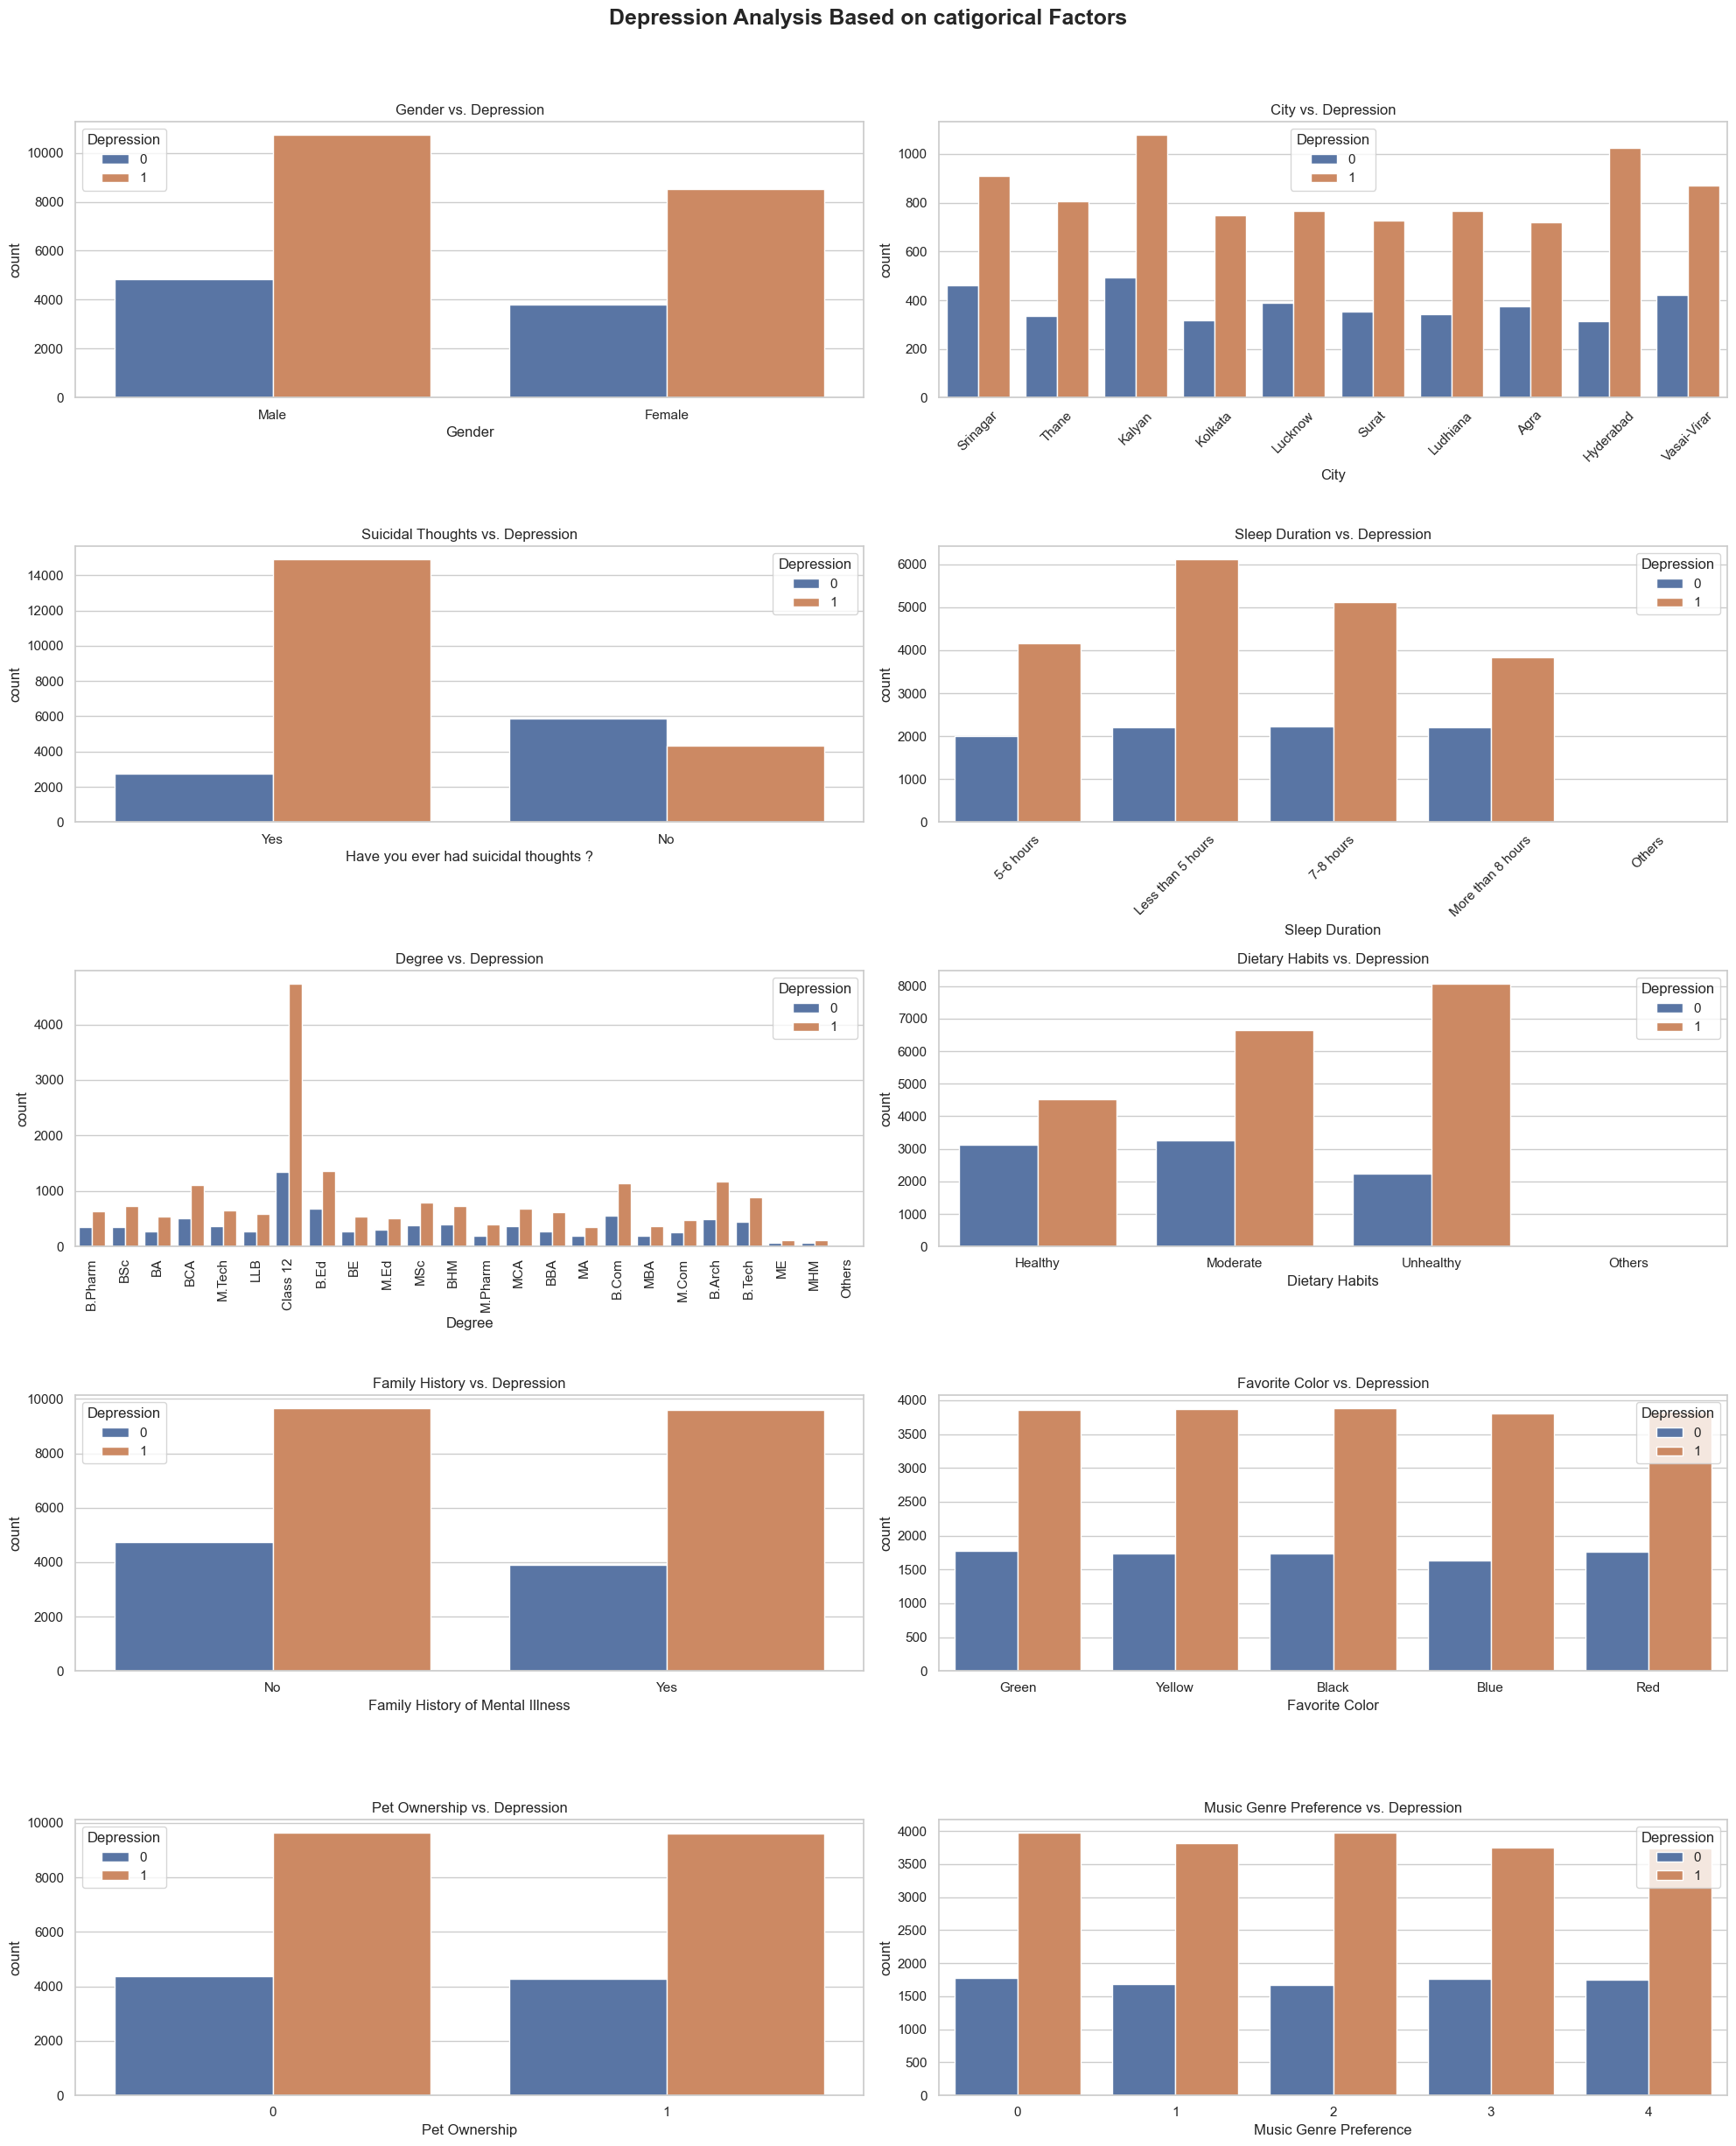

In [68]:
# Set up the figure size and style
sns.set(style="whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 25))  # 5 rows, 3 columns of subplots
fig.suptitle("Depression Analysis Based on catigorical Factors", fontsize=18, fontweight='bold')

# 1. Gender vs. Depression (Bar Chart)
sns.countplot(x="Gender", hue="Depression", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Gender vs. Depression")

# 2. City vs. Depression (Top 10 Cities - Bar Chart)
top_cities = df["City"].value_counts().head(10).index
sns.countplot(x="City", hue="Depression", data=df[df["City"].isin(top_cities)], ax=axes[0, 1])
axes[0, 1].set_title("City vs. Depression")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Suicidal Thoughts vs. Depression (Stacked Bar Chart)
sns.countplot(x="Have you ever had suicidal thoughts ?", hue="Depression", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Suicidal Thoughts vs. Depression")

# 4. Sleep Duration vs. Depression (Stacked Bar Chart)
sns.countplot(x="Sleep Duration", hue="Depression", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Sleep Duration vs. Depression")
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. Degree vs. Depression (Bar Chart)
sns.countplot(x="Degree", hue="Depression", data=df, ax=axes[2, 0])
axes[2, 0].set_title("Degree vs. Depression")
axes[2, 0].tick_params(axis='x', rotation=90)

# 6. Dietary Habits vs. Depression (Bar Chart)
sns.countplot(x="Dietary Habits", hue="Depression", data=df, ax=axes[2, 1])
axes[2, 1].set_title("Dietary Habits vs. Depression")

# 7. Family History of Mental Illness vs. Depression (Bar Chart)
sns.countplot(x="Family History of Mental Illness", hue="Depression", data=df, ax=axes[3, 0])
axes[3, 0].set_title("Family History vs. Depression")

# 8. Favourite color vs. Depression (Bar Chart)
sns.countplot(x="Favorite Color", hue="Depression", data=df, ax=axes[3, 1])
axes[3, 1].set_title("Favorite Color vs. Depression")

# 9. Pet Ownership vs. Depression (Bar Chart)
sns.countplot(x="Pet Ownership", hue="Depression", data=df, ax=axes[4, 0])
axes[4, 0].set_title("Pet Ownership vs. Depression")

# 10. Music Genre Preference vs. Depression (Bar Chart)
sns.countplot(x="Music Genre Preference", hue="Depression", data=df, ax=axes[4, 1])
axes[4, 1].set_title("Music Genre Preference vs. Depression")

# Adjust layout for readability
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()